<a href="https://colab.research.google.com/github/omkardesai98/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -Sumit Berde
##### **Team Member 2 -Omkar Desai

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [182]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [183]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [184]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cohort-chicago/Capston Project ML 2/data_cardiovascular_risk.csv')

### Dataset First View

In [185]:
# Dataset First Look
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [186]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Rename Columns

In [187]:
df.rename(columns={'cigsPerDay':'cigs_per_day','BPMeds':'bp_meds','prevalentStroke':'prevalent_stroke',
                     'prevalentHyp':'prevalent_hyp','totChol':'total_cholesterol','sysBP':'systolic_bp',
                     'diaBP':'diastolic_bp','BMI':'bmi','heartRate':'heart_rate',
                     'TenYearCHD':'ten_year_chd'},inplace=True)

### Dataset Information

In [188]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3390 non-null   int64  
 1   age                3390 non-null   int64  
 2   education          3303 non-null   float64
 3   sex                3390 non-null   object 
 4   is_smoking         3390 non-null   object 
 5   cigs_per_day       3368 non-null   float64
 6   bp_meds            3346 non-null   float64
 7   prevalent_stroke   3390 non-null   int64  
 8   prevalent_hyp      3390 non-null   int64  
 9   diabetes           3390 non-null   int64  
 10  total_cholesterol  3352 non-null   float64
 11  systolic_bp        3390 non-null   float64
 12  diastolic_bp       3390 non-null   float64
 13  bmi                3376 non-null   float64
 14  heart_rate         3389 non-null   float64
 15  glucose            3086 non-null   float64
 16  ten_year_chd       3390 

#### Duplicate Values

In [189]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [190]:
# Missing Values/Null Values Count
df.isnull().sum()

id                     0
age                    0
education             87
sex                    0
is_smoking             0
cigs_per_day          22
bp_meds               44
prevalent_stroke       0
prevalent_hyp          0
diabetes               0
total_cholesterol     38
systolic_bp            0
diastolic_bp           0
bmi                   14
heart_rate             1
glucose              304
ten_year_chd           0
dtype: int64

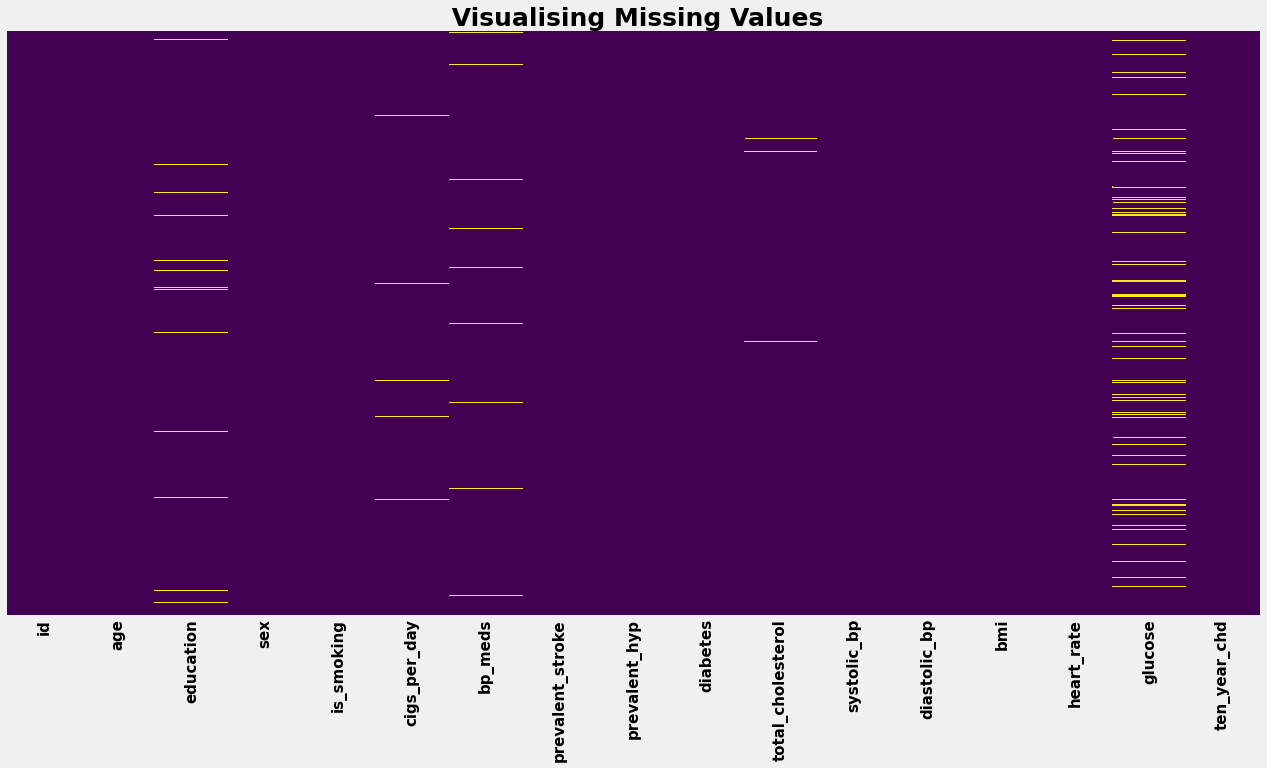

In [191]:
# Visualizing the missing values
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(),cmap="viridis",yticklabels=False,cbar=False)
plt.title(" Visualising Missing Values");

### What did you know about your dataset?

This dataset contain information of patients such as information about patients age,id,sex,is_smoking etc. it include 3390 records and 17 features.It have 0 duplicate rows and also some columns including education,cigsPerDay,BPMeds,totChol,glucose have some null values.  

## ***2. Understanding Your Variables***

In [192]:
# Dataset Columns
print(df.columns)

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigs_per_day',
       'bp_meds', 'prevalent_stroke', 'prevalent_hyp', 'diabetes',
       'total_cholesterol', 'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate',
       'glucose', 'ten_year_chd'],
      dtype='object')


In [193]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.75,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigs_per_day,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
bp_meds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalent_stroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalent_hyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
total_cholesterol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
systolic_bp,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [194]:
# Check Unique Values for each variable.
for i in df.columns:
  print(f'unique values in {i} are : {df[i].nunique()}')

unique values in id are : 3390
unique values in age are : 39
unique values in education are : 4
unique values in sex are : 2
unique values in is_smoking are : 2
unique values in cigs_per_day are : 32
unique values in bp_meds are : 2
unique values in prevalent_stroke are : 2
unique values in prevalent_hyp are : 2
unique values in diabetes are : 2
unique values in total_cholesterol are : 240
unique values in systolic_bp are : 226
unique values in diastolic_bp are : 142
unique values in bmi are : 1259
unique values in heart_rate are : 68
unique values in glucose are : 132
unique values in ten_year_chd are : 2


AS 

## 3. ***Data Wrangling***

In [195]:
# Droping column 'Id' as it does not give any information
df.drop(columns=['id'],axis=1,inplace=True) 

# Mapping values in categorical features with appropriate name for analysis
df['sex'] = df['sex'].map({'M':'Male','F':'Female'})
df['is_smoking'] = df['is_smoking'].map({'YES':'Yes','NO':'No'})

for col in ['bp_meds','prevalent_stroke','prevalent_hyp','diabetes']:
  df[col] = df[col].map({1:'Yes',0:'No'}) 

### What all manipulations have you done and insights you found?

1. Dropped 'Id' feature as it does not give any information
2. Mapping values in 'sex' , 'is_smoking', 'bp_meds' , 'prevalent_stroke' , 'prevalent_hyp' , 'diabetes' with appropriate name for analysis 
3. We have kept nan values in dataset.After analaysing the dataset, we will deal with missing values  

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [196]:
# setting max display column limit to 20
pd.set_option("display.max_columns", 20)

#set style
plt.style.use('fivethirtyeight')


# setting font weight,label weight,title weight to bold and setting title size,label size,fontsize.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

import warnings
warnings.filterwarnings('ignore')

In [197]:
df.describe()

,age,education,cigs_per_day,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
count,3390.000000,3303.000000,3368.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,9.069477,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,11.879078,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [198]:
# Creating list of numerical features
num_col = list(df.describe().loc[:,['age', 'cigs_per_day', 'total_cholesterol', 'systolic_bp', 'diastolic_bp',
       'bmi', 'heart_rate', 'glucose']].columns)

# Creating list of categorical features
cat_col = list(df.describe(include='O').columns)     

### Univariate Analysis

#### Frequency distribution in categorical features

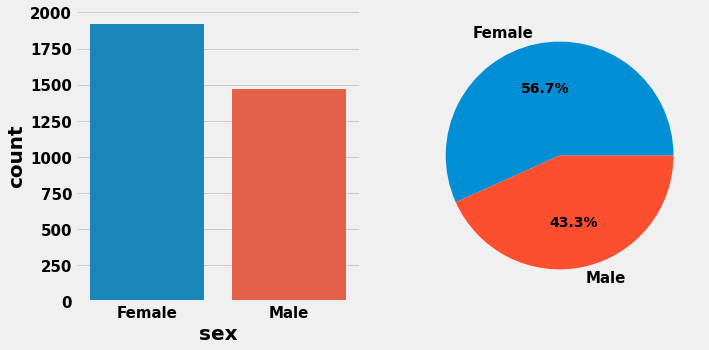

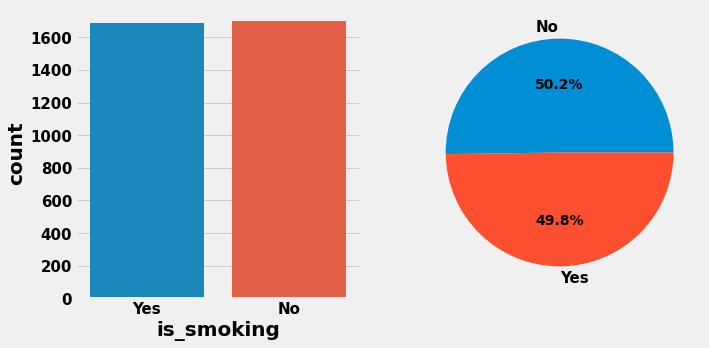

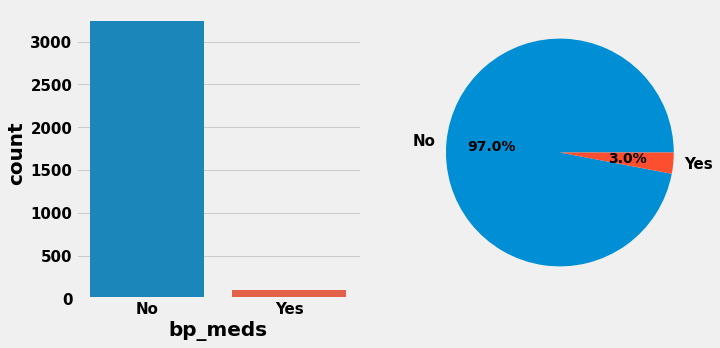

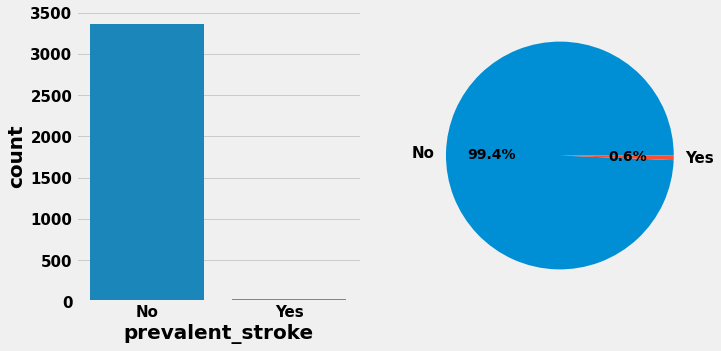

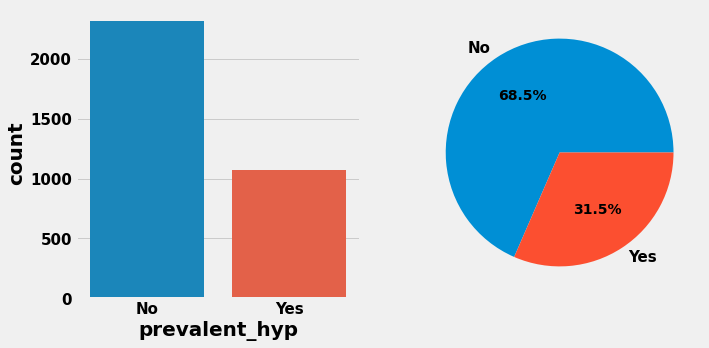

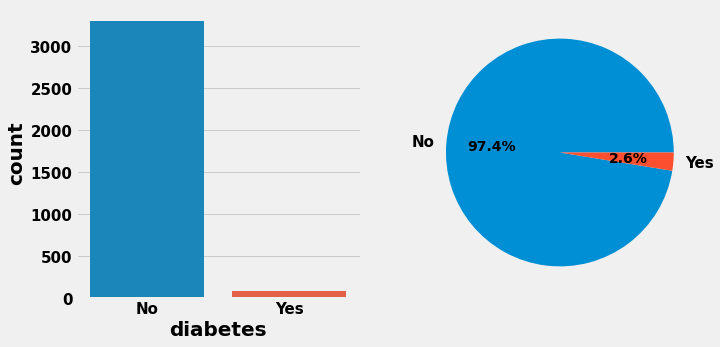

In [199]:
# Plotting for frequency distribution in categorical features
for col in cat_col:
  fig,ax = plt.subplots(1,2,figsize=(10,5))
  sns.countplot(data=df,x=col,ax=ax[0])
  ax[1].pie(df[col].value_counts(),autopct='%1.1f%%',labels=df[col].value_counts().index)

##### 1. Why did you pick the specific chart?

A barplot is basically used to aggregate the categorical data according to some methods and by default it’s the mean. It can also be understood as a visualization of the group by action. To use this plot we choose a categorical column for the x-axis and a numerical column for the y-axis to plot the frequency distribution of categories

##### 2. What is/are the insight(s) found from the chart?

1. Dataset consisted of more female population.Female represents 56.7% of data and male represents 43.3% of data
2. There is almost equal proportion of smokers(49.8%) and non-smokers(50.2%) in the data
3. Most of the people in the dataset were not on blood pressure medication almost 97%
4. Most of the people in the dataset did not have any previous history of strokes almost 99.4%
5. Significant number of people in the dataset had previous history of hypertension almost 31.5%
6. Most of people in the dataset did not have diabetes
almost 97.4%   

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Checking distribution of data in numerical features

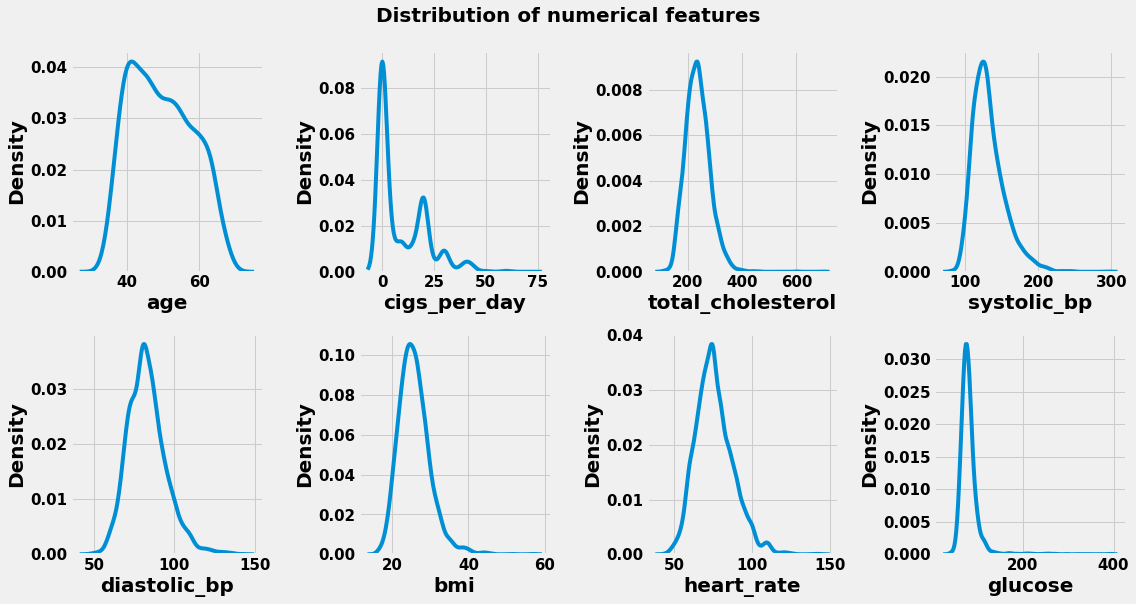

In [200]:
# Plotting to check distribution in numerical features
plt.figure(figsize=(16,8))
plt.suptitle('Distribution of numerical features',fontweight='bold',fontsize=20,y=1.05)
for i,col in enumerate(num_col): 
  plt.subplot(2,4,i+1)
  sns.kdeplot(data=df,x=col)
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

##### 2. What is/are the insight(s) found from the chart?

1. Age is not normally distributed
2. Cigs_per_day appears to have bimodal(2 modes) distribution
3. total_cholesterol , systolic_bp , diastolic_bp , Bmi , heart_rate , glucose is right skewed. Log transformation ideally should be used for right skewed data  

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Checking for outliers in numerical features

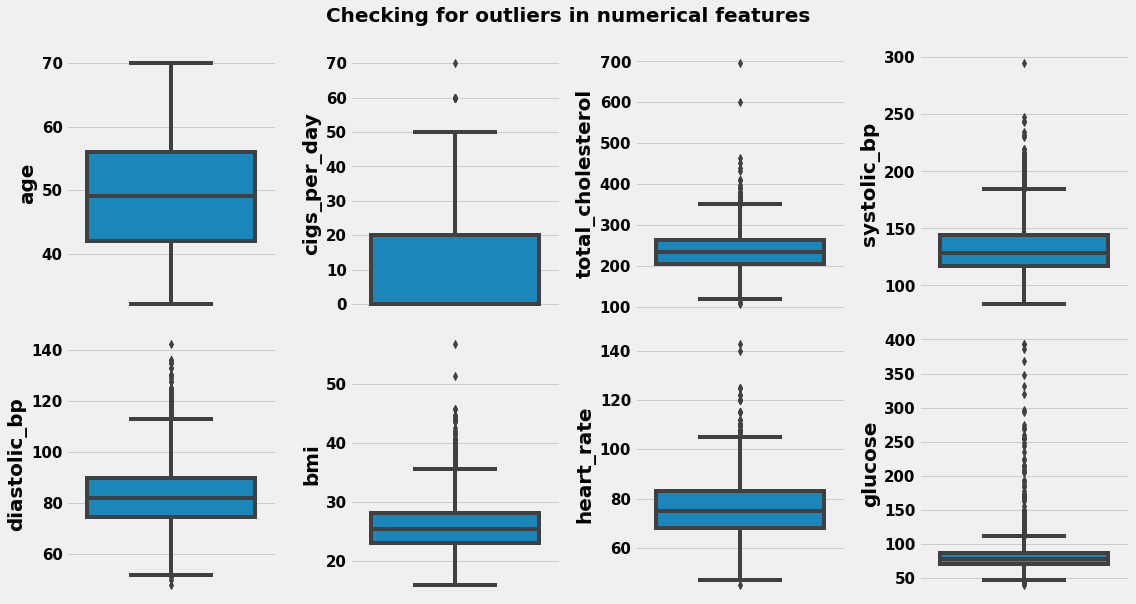

In [201]:
# Plotting boxplot to check for outliers
plt.figure(figsize=(16,8))
plt.suptitle('Checking for outliers in numerical features',fontweight='bold',fontsize=20,y=1.05)
for i,col in enumerate(num_col):
  plt.subplot(2,4,i+1)
  sns.boxplot(data=df,y=col)
  plt.tight_layout() 

##### 1. Why did you pick the specific chart?

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

##### 2. What is/are the insight(s) found from the chart?

1. Age does not have any outliers
2. cigs_per_day , total_cholesterol , systolic_bp , diastolic_bp , bmi , heart_rate , glucose has outliers.We have deal with it later

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### Bivariate and Multivariate Analysis

#### Finding the rate of people having cardiovasacular disease within categorical features

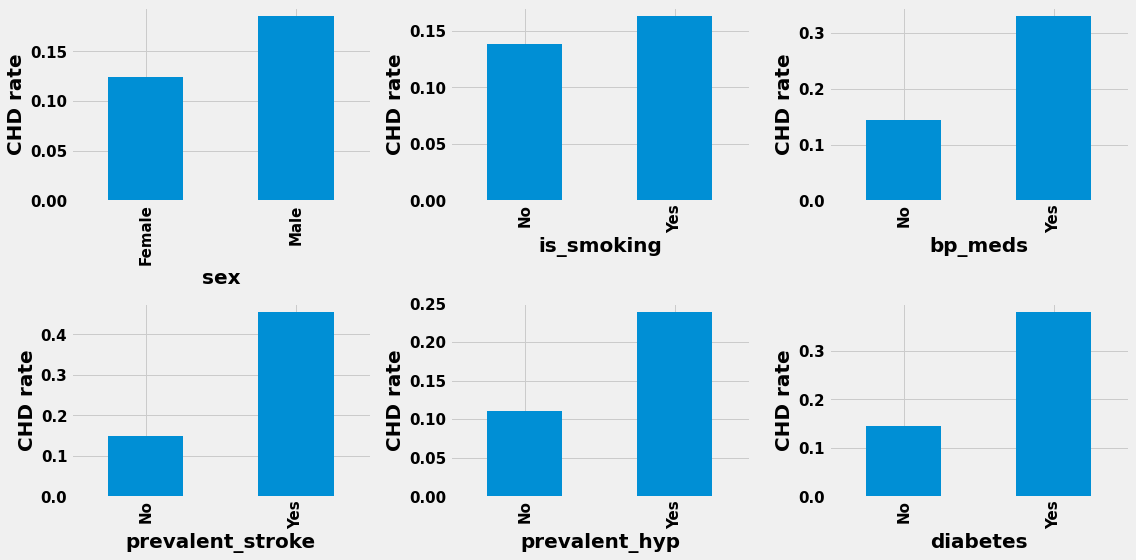

In [202]:
# Performing groupby operation to find rate of people having coronary heart disease(CHD) per category
plt.figure(figsize=(16,8))
for i,col in enumerate(cat_col):
  plt.subplot(2,3,i+1)
  df.groupby(col)['ten_year_chd'].mean().plot(kind='bar')   # Groupby category and finding mean of ten_year_chd
  plt.ylabel('CHD rate')
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

A barplot is basically used to aggregate the categorical data according to some methods and by default it’s the mean. It can also be understood as a visualization of the group by action. To use this plot we choose a categorical column for the x-axis and a numerical column for the y-axis to plot the frequency distribution of categories

##### 2. What is/are the insight(s) found from the chart?

1. Males seems to have higher rate of contracting heart disease than females.
2. Smoking increases the chances of getting heart disease as more individuals who smoke seems to suffer from heart diasease 
3. It looks like if someone has pre-medical conditions such as blood pressure medication,prevalent stroke,prevalent hypertension and diabetes his chances of getting heart disease increases

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Now lets do a detailed study about how various factors like smoking and pre-medical conditions like blood pressure medication,prevalent stroke,hypertension,diabetes effects your chances of contracting heart disease 

#### Plotting to find percentage of male and female smokers and finding the average cigrates smoked by males and females

Count of Males and Females who are smokers
----------------------------------------------------------------------------------------------------


,sex,counts
0,Male,911
1,Female,776


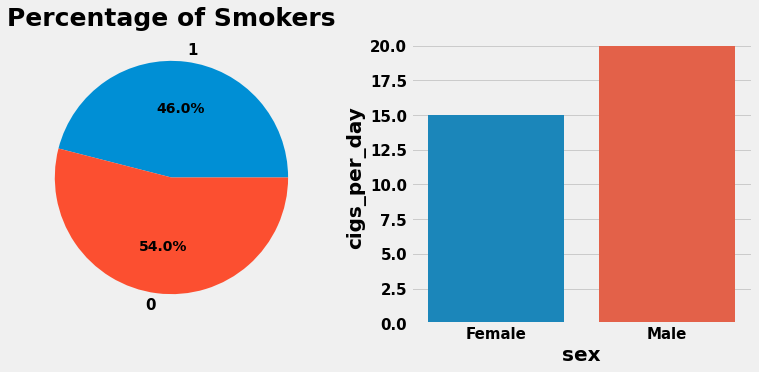

In [203]:
# Creating a df containing only smokers for analysis
smokers_df = df.loc[df['is_smoking']=='Yes',['sex','is_smoking','cigs_per_day','ten_year_chd']]

# Aggregating by gender and finding count of male and female smokers,also finding avg cigs per day by males and females
count_median_df = smokers_df.groupby('sex').agg({'ten_year_chd':'count','cigs_per_day':'median'}).reset_index()

# # Plotting pie chart for showing percentage of male-female smokers, also barchart for avg cigarates smoked per day by males and females
fig,ax = plt.subplots(1,2,figsize=(12,5))
ax[0].pie(count_median_df['ten_year_chd'],autopct='%1.1f%%',labels=['1','0'])
ax[0].set_title('Percentage of Smokers')
sns.barplot(data=count_median_df,x='sex',y='cigs_per_day',ax=ax[1])
fig.show()

print('Count of Males and Females who are smokers')
print(100*'-')
smokers_df['sex'].value_counts().reset_index().rename(columns={'index':'sex','sex':'counts'})

In [204]:
# Finding out percentage of smokers and non-smokers in males and females who developed heart disease
print('Percentage of smokers and non-smokers in males/females, who developed heart disease')
print(90*'-')
pd.crosstab(index=[df['sex'],df['is_smoking']],columns=df['ten_year_chd'],normalize='index').round(4)*100

Percentage of smokers and non-smokers in males/females, who developed heart disease
------------------------------------------------------------------------------------------


ten_year_chd           0      1
sex    is_smoking              
Female No          87.18  12.82
       Yes         88.14  11.86
Male   No          83.99  16.01
       Yes         79.91  20.09

##### 1. Why did you pick the specific chart?

A Pie Chart is a circular statistical plot that can display only one series of data. The area of the chart is the total percentage of the given data. The area of slices of the pie represents the percentage of the parts of the data.

##### 2. What is/are the insight(s) found from the chart?

1. Out of all the smokers, 54% are males and 46% are females
2. In males, smoking seems to have increased the chances of getting heart disease.Out of all male smokers,        20.09% of them eventually suffered from heart disease. As compared to male non-smokers only 16.01% of them suffered from heart disease.There is 4% increase in chances in males of getting heart disease due to smoking
3. In females there seems to be no effect of smoking. But we think it may be due to insufficient data
4. Males on an average smoke more than females   

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Plotting to find percentage of males and females that were on blood pressure medication.Then finding how blood pressure medication effects your chances of having heart disease

Count of Males and Females who were on blood pressure medication
----------------------------------------------------------------------------------------------------


,sex,counts
0,Female,69
1,Male,31


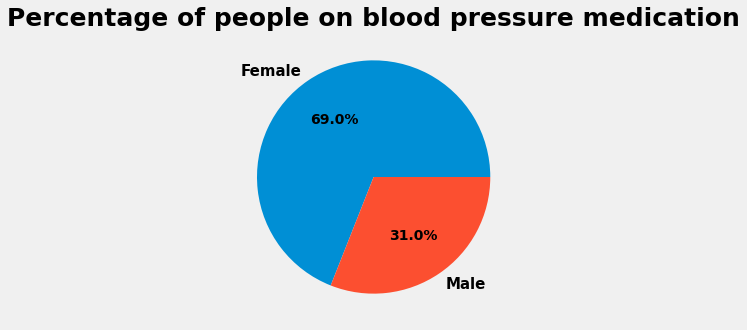

In [205]:
# Creating df of people who were previously on blood pressure medication 
blood_pressure_medication = df.loc[df['bp_meds']=='Yes',['sex']]

# Counting number of males and females on blood pressure medication
bp_med_count_df = blood_pressure_medication.value_counts().reset_index().rename(columns={0:'counts'})

# Plotting percentage of males and females who were on blood pressure medication
plt.figure(figsize=(7,5))
plt.pie(bp_med_count_df['counts'],autopct='%1.1f%%',labels=['Female','Male'])
plt.title('Percentage of people on blood pressure medication');

print('Count of Males and Females who were on blood pressure medication')
print(100*'-')
bp_med_count_df

In [206]:
# Finding percentage of males and females who were on blood pressure medication who eventually developed heart disease
print('Percentage of males and females who were on blood pressure medication who eventually developed heart disease')
print(110*'-')
pd.crosstab(index=[df['sex'],df['bp_meds']],columns=df['ten_year_chd'],normalize='index').round(4)*100

Percentage of males and females who were on blood pressure medication who eventually developed heart disease
--------------------------------------------------------------------------------------------------------------


ten_year_chd        0      1
sex    bp_meds              
Female No       88.36  11.64
       Yes      68.12  31.88
Male   No       81.82  18.18
       Yes      64.52  35.48

##### 1. Why did you pick the specific chart?

A Pie Chart is a circular statistical plot that can display only one series of data. The area of the chart is the total percentage of the given data. The area of slices of the pie represents the percentage of the parts of the data.

##### 2. What is/are the insight(s) found from the chart?

1. Out of all those people those who were on blood pressure medication 69% were females and 31% were males
2. In both males and females, the effect of blood pressure medication can be seen.In males out of all people who were on blood pressure medication 35.48% eventually contracted heart disease, whereas in females 31.88% contracted heart disease
3. In males those who were not on blood pressure medication only 18.18% people contracted heart disease and in females 11.64% contracted heart disease.Being on blood pressure medication increases your chances of getting heart disease 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Plotting to find percentage of males and females who had prevalent stroke.Then finding out how having prevalent stroke effects your chances of having heart disease

Count of Males and Females who previously had stroke
----------------------------------------------------------------------------------------------------


,sex,counts
0,Female,14
1,Male,8


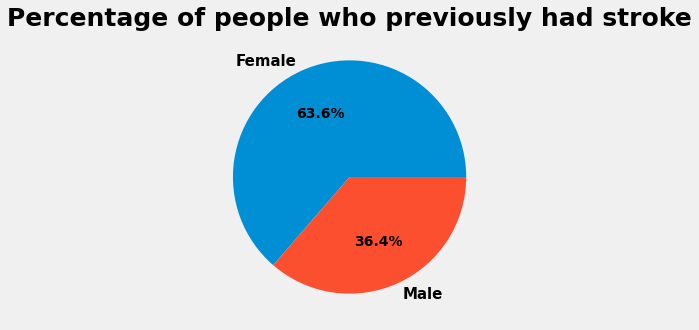

In [207]:
# Creating df of people who previously had stroke 
prevalent_stroke = df.loc[df['prevalent_stroke']=='Yes',['sex']]

# Counting number of males and females who previously had stroke
prevalent_stroke_count_df = prevalent_stroke.value_counts().reset_index().rename(columns={0:'counts'})

# Plotting percentage of males and females who previously had stroke
plt.figure(figsize=(7,5))
plt.pie(prevalent_stroke_count_df['counts'],autopct='%1.1f%%',labels=['Female','Male'])
plt.title('Percentage of people who previously had stroke');

print('Count of Males and Females who previously had stroke')
print(100*'-')
prevalent_stroke_count_df

In [208]:
# Finding percentage of males and females who were on blood pressure medication who eventually developed heart disease
print('Percentage of males and females who previously had stroke, who eventually developed heart disease')
print(110*'-')
pd.crosstab(index=[df['sex'],df['prevalent_stroke']],columns=df['ten_year_chd'],normalize='index').round(4)*100

Percentage of males and females who previously had stroke, who eventually developed heart disease
--------------------------------------------------------------------------------------------------------------


ten_year_chd                 0      1
sex    prevalent_stroke              
Female No                87.79  12.21
       Yes               57.14  42.86
Male   No                81.63  18.37
       Yes               50.00  50.00

##### 1. Why did you pick the specific chart?

A Pie Chart is a circular statistical plot that can display only one series of data. The area of the chart is the total percentage of the given data. The area of slices of the pie represents the percentage of the parts of the data.

##### 2. What is/are the insight(s) found from the chart?

1. Out of those people those who had prevalent stroke    63.6% were females and 36.4% were males
2. 50% of males who had stroke eventually developed heart disease and 42.86% of females who had stroke developed heart disease
3. Having prevalent stroke,significantly increases your chances of having heart disease  


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Plotting to find percentage of males and females who had prevalent hypertension.Then finding out how having prevalent hypertension effects your chances of having heart disease

Count of Males and Females having hypertension
----------------------------------------------------------------------------------------------------


,sex,counts
0,Female,604
1,Male,465


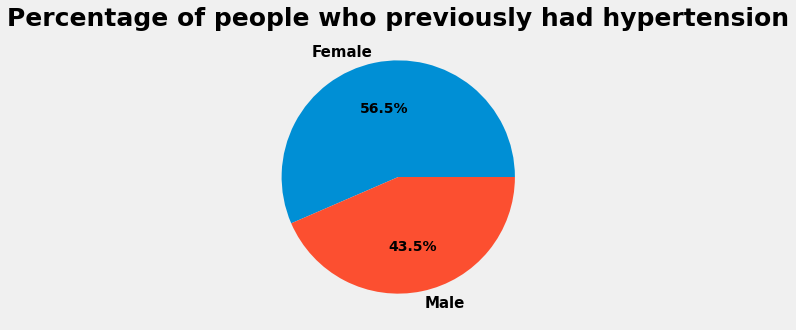

In [209]:
# Creating df of people who previously had hypertension 
prevalent_hypertension = df.loc[df['prevalent_hyp']=='Yes',['sex']]

# Counting number of males and females who previously had hypertension
prevalent_hypertension_count_df = prevalent_hypertension.value_counts().reset_index().rename(columns={0:'counts'})

# Plotting percentage of males and females who previously had hypertension
plt.figure(figsize=(7,5))
plt.pie(prevalent_hypertension_count_df['counts'],autopct='%1.1f%%',labels=['Female','Male'])
plt.title('Percentage of people who previously had hypertension');

print('Count of Males and Females having hypertension')
print(100*'-')
prevalent_hypertension_count_df

In [210]:
# Finding percentage of males and females who had hypertension who eventually developed heart disease
print('Percentage of males and females who previously had hypertension, who eventually developed heart disease')
print(110*'-')
pd.crosstab(index=[df['sex'],df['prevalent_hyp']],columns=df['ten_year_chd'],normalize='index').round(4)*100

Percentage of males and females who previously had hypertension, who eventually developed heart disease
--------------------------------------------------------------------------------------------------------------


ten_year_chd              0      1
sex    prevalent_hyp              
Female No             91.74   8.26
       Yes            78.48  21.52
Male   No             85.33  14.67
       Yes            73.12  26.88

##### 1. Why did you pick the specific chart?

A Pie Chart is a circular statistical plot that can display only one series of data. The area of the chart is the total percentage of the given data. The area of slices of the pie represents the percentage of the parts of the data.

##### 2. What is/are the insight(s) found from the chart?

1. Out of all those people who had hypertension, 56.5% were females and 43.5% were males
2. 26.88% of males who previously had hypertension developed heart disease and 21.52% of females who had hypertension developed heart disease
3. So having hypertension increases your chances of having heart disease

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Plotting to find percentage of males and females who had diabetes.Then finding out how having diabetes effects your chances of having heart disease

Count of Males and Females having diabetes
----------------------------------------------------------------------------------------------------


,sex,counts
0,Female,47
1,Male,40


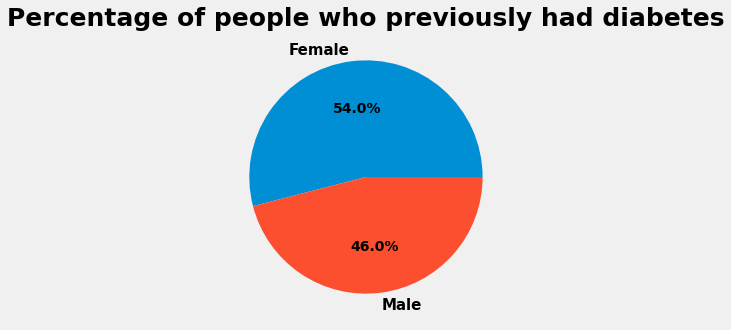

In [211]:
# Creating df of people who previously had diabetes
prevalent_diabetes = df.loc[df['diabetes']=='Yes',['sex']]

# Counting number of males and females who previously had diabetes
prevalent_diabetes_count_df = prevalent_diabetes.value_counts().reset_index().rename(columns={0:'counts'})

# Plotting percentage of males and females who previously had diabetes
plt.figure(figsize=(7,5))
plt.pie(prevalent_diabetes_count_df['counts'],autopct='%1.1f%%',labels=['Female','Male'])
plt.title('Percentage of people who previously had diabetes');

print('Count of Males and Females having diabetes')
print(100*'-')
prevalent_diabetes_count_df

In [212]:
# Finding percentage of males and females who had diabetes, who eventually developed heart disease
print('Percentage of males and females who previously had diabetes, who eventually developed heart disease')
print(110*'-')
pd.crosstab(index=[df['sex'],df['diabetes']],columns=df['ten_year_chd'],normalize='index').round(4)*100

Percentage of males and females who previously had diabetes, who eventually developed heart disease
--------------------------------------------------------------------------------------------------------------


ten_year_chd         0      1
sex    diabetes              
Female No        88.06  11.94
       Yes       68.09  31.91
Male   No        82.20  17.80
       Yes       55.00  45.00

##### 1. Why did you pick the specific chart?

A Pie Chart is a circular statistical plot that can display only one series of data. The area of the chart is the total percentage of the given data. The area of slices of the pie represents the percentage of the parts of the data.

##### 2. What is/are the insight(s) found from the chart?

1. Out of all those people who had diabetes, 54% were females and 46% were males
2. 45% of males who had diabetes developed heart disease
and 31.91% of females who had diabetes developed heart disease
3. So having diabetes plays a role in person developing heart disease

#### So to conclude is_smoking , bp_meds , prevalent_stroke , prevalent_hypertension , diabetes increases the chances of contracting heart disease. Those people who have suffered from stroke are most vulnerable towards developing heart disease 

#### Now we will look at all the numeric features for analysis

#### Plotting barplot to find the average value of numerical features when people contract heart disease and when people do not contract heart disease

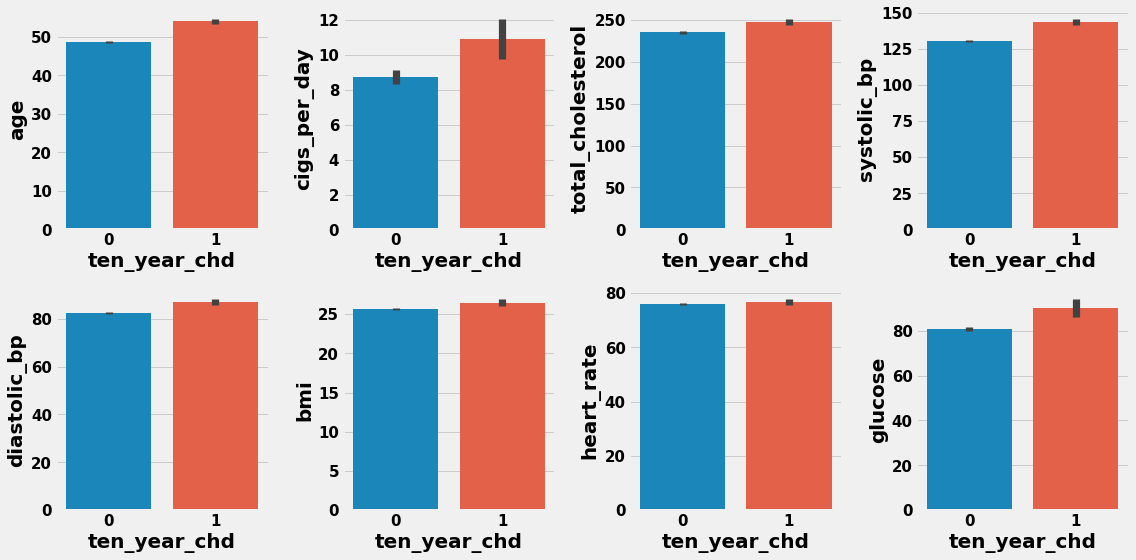

In [213]:
# Groupby ten_year_chd and then finding the mean of every numerical features
plt.figure(figsize=(16,8))
for i,col in enumerate(num_col):
 plt.subplot(2,4,i+1)
 sns.barplot(data=df,x='ten_year_chd',y=col)
 plt.tight_layout()

##### 1. Why did you pick the specific chart?

A barplot is basically used to aggregate the categorical data according to some methods and by default it’s the mean. It can also be understood as a visualization of the group by action. To use this plot we choose a categorical column for the x-axis and a numerical column for the y-axis to plot the frequency distribution of categories

##### 2. What is/are the insight(s) found from the chart?

1. Age , cigs_per_day , total_cholesterol , systolic_bp , diastolic_bp , glucose generally have high values for people developing heart disease as compared to people who not develop heart disease.
2. Heart rate and bmi are seems to be same for people developing heart disease and for people not developing heart disease

#### Pair Plot 

<Figure size 1440x1080 with 0 Axes>

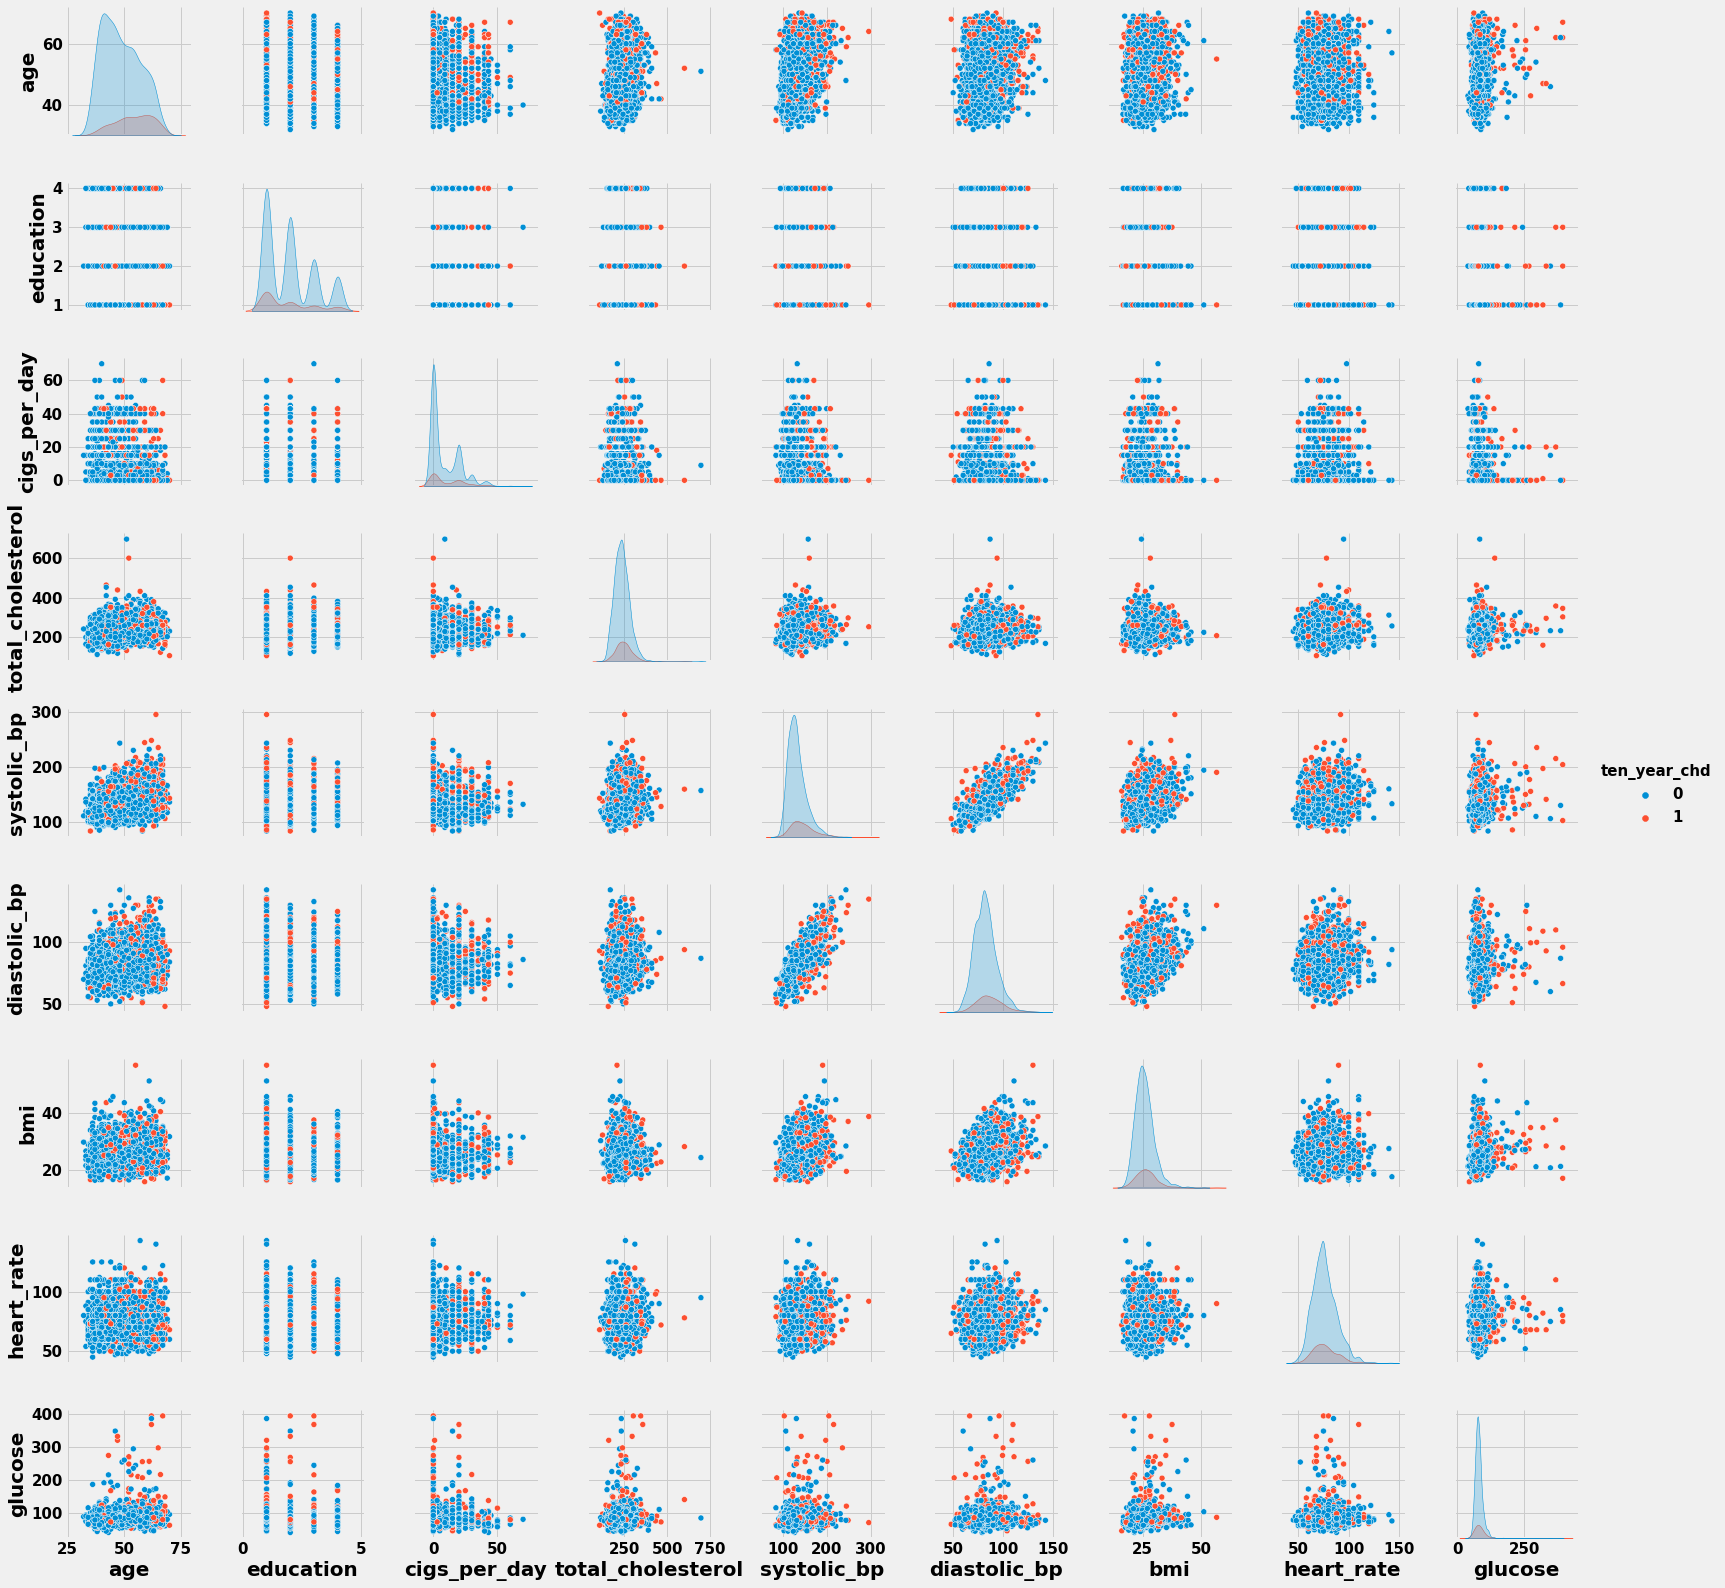

In [214]:
# Plotting pairplot to understand the relationship between numerical features and to see that if target classes are seperable are not
plt.figure(figsize=(20,15))
sns.pairplot(data=df,hue='ten_year_chd');

##### 1. Why did you pick the specific chart?

Pairplot helps to understand which numerical features are important and helps to distinguish between two target classes

##### 2. What is/are the insight(s) found from the chart?

1. All the scatter plots that have been plotted does not give any information.Target classes are not seperable in the scatter plot
2. Scatter plot of 'glucose' with other features shows some seperatablity.Target classes are somewhat seperable

#### Correlation Heatmap

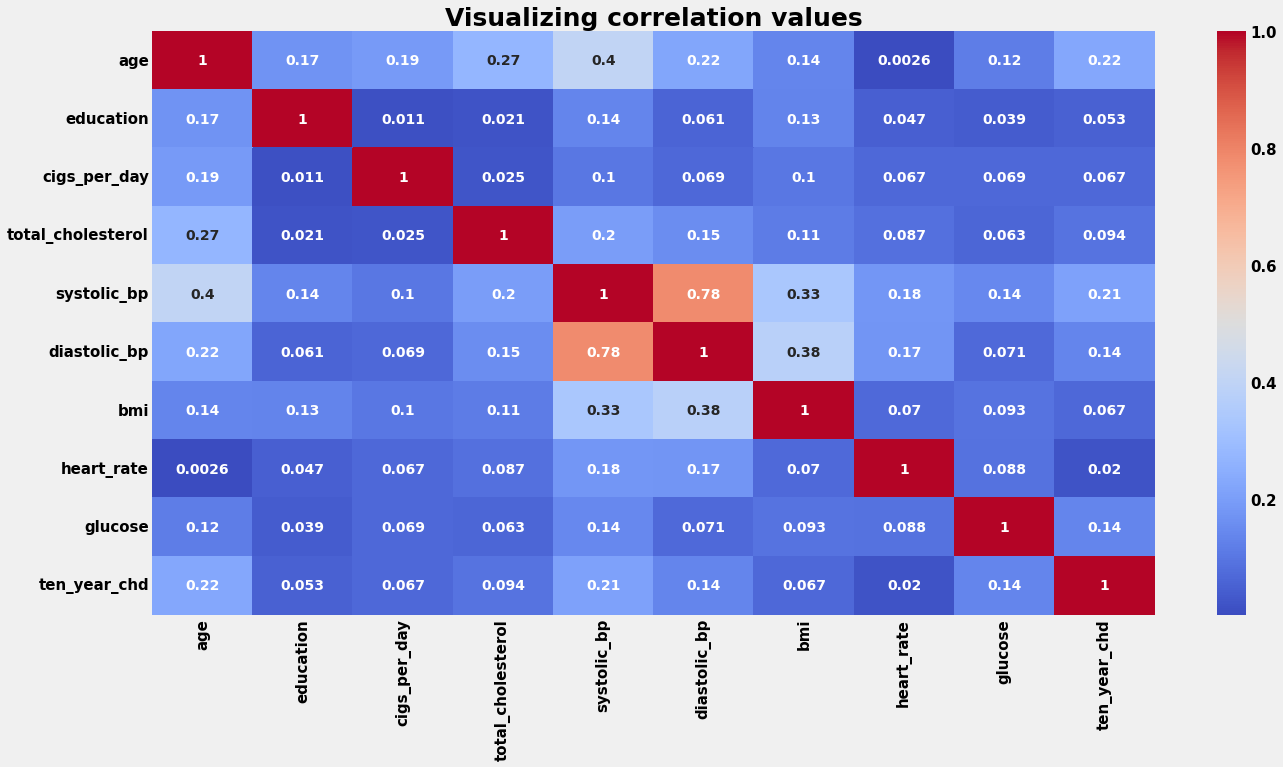

In [215]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,10))
sns.heatmap(abs(df.corr()),cmap='coolwarm',annot=True)
plt.title("Visualizing correlation values");

##### 1. Why did you pick the specific chart?

Heatmap helps to visualize the Pearsons correlation coeffient properly

##### 2. What is/are the insight(s) found from the chart?

1. Systolic blood pressure and diastolic blood pressure are highly correlated.Pulse pressure is defined as difference between systolic bp and diastolic bp. We are creating a new feature pulse pressure and then droping both systolic and diastolic bp
2. Multi-collinearity does not exist between other features apart from systolic and diastolic bp
3. Education has very little correlation with target variable.Dropping education feature 

#### Creating new feature called as pulse pressure which is difference between systolic and diastolic bp

In [216]:
# Creating new feature called as pulse pressure which is difference between systolic and diastolic bp
df['pulse_pressure'] = df['systolic_bp'] - df['diastolic_bp']

# Dropping systolic_bp and diastolic_bp
df.drop(columns=['systolic_bp','diastolic_bp'],axis=1,inplace=True)

# Dropping education feature
df.drop(columns=['education'],axis=1,inplace=True) 

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Does people with heart disease have mean pulse pressure significantlly higher than those people who do not have heart disease
2. Does people with heart disease have mean cholesterol significantly higher than those people who do not have heart disease
3. Is there a statistically significant relationship between prevalent_hypertension and ten_year_chd


### Hypothetical Statement - 1

1. Does people with heart disease have mean pulse pressure significantlly higher than those people who do not have heart disease

*  Null Hypothesis (H0) : there is no significant difference in mean
*   Alternate Hypothesis (H1) : there is significant difference between 
*   Test Type : z-test

#### 2. Perform an appropriate statistical test.

In [217]:
from statsmodels.stats.weightstats import ztest as ztest
#perform two sample z-test
ztest(df.loc[df['ten_year_chd']==1,'pulse_pressure'],df.loc[df['ten_year_chd']==0,'pulse_pressure'],value=0)

(12.398719779833648, 2.6553199216554086e-35)

In [218]:
def results(p):
  if (p['p_value']<0.05):p['hypothesis_accepted'] = 'alternative'
  if(p['p_value']>0.05):p['hypothesis_accepted'] = 'null'
  df = pd.DataFrame(p,index=[''])
  cols = ['value1','value2','score','p_value','hypothesis_accepted']
  return df[cols]

In [219]:
p = {} # dictionary we'll use to stock information and results
p['value1'],p['value2'] = np.mean(df.loc[df['ten_year_chd']==1,'pulse_pressure']),np.mean(df.loc[df['ten_year_chd']==0,'pulse_pressure'])
p['score'],p['p_value'] = ztest(df.loc[df['ten_year_chd']==1,'pulse_pressure'],df.loc[df['ten_year_chd']==0,'pulse_pressure'],alternative='two-sided')
results(p)

,value1,value2,score,p_value,hypothesis_accepted
,57.090998,48.409517,12.39872,2.655320e-35,alternative


##### Which statistical test have you done to obtain P-Value?

We use z-test test

##### Why did you choose the specific statistical test?

z-test is used to know whether two mean are same or not.

### Hypothetical Statement - 2

#### Does people with heart disease have mean cholesterol significantly higher than those people who do not have heart disease

*  Null Hypothesis (H0) : there is no significant difference 
*   Alternate Hypothesis (H1) : there is significant difference between

#### 2. Perform an appropriate statistical test.

In [220]:
#creating dataframe which include require testing columns
s1 = pd.Series(df.loc[df['total_cholesterol'].isna()==False,'total_cholesterol'])
s2 = pd.Series(df['ten_year_chd'])
c = pd.concat([s1,s2],axis=1)

In [221]:
df2=pd.DataFrame(c)
df2.head()

,total_cholesterol,ten_year_chd
0,221.0,1
1,212.0,0
2,250.0,0
3,233.0,1
4,241.0,0


In [222]:
df2.dropna(inplace=True)

In [223]:
#perform two sample z-test
ztest(df2.loc[df['ten_year_chd']==1,'total_cholesterol'],df2.loc[df['ten_year_chd']==0,'total_cholesterol'],value=0)

(5.482787549828961, 4.1867569629215976e-08)

In [224]:
p = {} # dictionary we'll use to stock information and results
p['value1'],p['value2'] = np.mean(df2.loc[df['ten_year_chd']==1,'total_cholesterol']),np.mean(df.loc[df['ten_year_chd']==0,'total_cholesterol'])
p['score'],p['p_value'] = ztest(df2.loc[df['ten_year_chd']==1,'total_cholesterol'],df2.loc[df['ten_year_chd']==0,'total_cholesterol'],alternative='two-sided')
results(p)

,value1,value2,score,p_value,hypothesis_accepted
,247.21627,235.279494,5.482788,4.186757e-08,alternative


##### Which statistical test have you done to obtain P-Value?

We have use z-test

##### Why did you choose the specific statistical test?

z-test is used to know whether two mean are same or not.

### Hypothetical Statement - 3

#### 1.There is relationship between prevalent_hyp and ten_year_chd.

*  Null Hypothesis (H0) : there is no relationship
*   Alternate Hypothesis (H1) : there is relationship
*   Test Type : Chi-square Test

#### 2. Perform an appropriate statistical test.

In [225]:
import scipy.stats as stats
from scipy.stats import chi2
df_table3 = pd.crosstab(df['prevalent_hyp'],df['ten_year_chd'])
print(df_table3)

ten_year_chd      0    1
prevalent_hyp           
No             2065  256
Yes             814  255


In [226]:
#observed values
Observed_values3 = df_table3.values
print('observed Values: ',Observed_values3)


observed Values:  [[2065  256]
 [ 814  255]]


In [227]:
val3 = stats.chi2_contingency(df_table3)
print(val3)

(93.02951112773958, 5.152036591565972e-22, 1, array([[1971.13834808,  349.86165192],
       [ 907.86165192,  161.13834808]]))


In [228]:
Expected_values3=val3[3]
no_of_rows3 = len(df_table3.iloc[0:2,0])
no_of_columns3 = len(df_table3.iloc[0,0:2])
ddof3 = (no_of_rows3 -1)*(no_of_columns3 -1)
print('degree of Freedom :-',ddof3)
alpha = 0.05

degree of Freedom :- 1


In [229]:
#getting Chi_square value
chi_square3 = sum([(o - e)**2./e for o,e in zip(Observed_values3,Expected_values3)])
chi_square_statistic3 = chi_square3[0] + chi_square3[1]
print('chi square statistic :',chi_square_statistic3)
critical_value3 = chi2.ppf(q = 1 - alpha,df = ddof3)
print('critical value:',critical_value3)

chi square statistic : 94.02862178847731
critical value: 3.841458820694124


In [230]:
#p-value
p_value3 = 1- chi2.cdf(x=chi_square_statistic3,df=ddof3)
print('p-value:',p_value3)
if p_value3 <= alpha:
  print('Reject H0,There is a relationship between sex and is_smoking')
else:
  print("Accept H0,There is no relationship between sex and is_smoking")

p-value: 0.0
Reject H0,There is a relationship between sex and is_smoking


##### Which statistical test have you done to obtain P-Value?

We use chi2 test

##### Why did you choose the specific statistical test?

chi2 test is used to find out wehter there is association between two columns.

## ***6. Feature Engineering & Data Pre-processing***

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [231]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 1. Data Splitting

* Since we are working with limited amount of data, ie, around 3390 records, **30%** of the records are set aside for testing, 70%  for training.
* Since the data is imbalanced, **stratified split** was employed to get almost equal proportion of dependent variables in the train and test sets.

In [232]:
from sklearn.model_selection import train_test_split

In [233]:
# Creating a copy of dataset
df3 = df.copy()

# Creating df of only independent features
X = df3.drop(columns='ten_year_chd',axis=1)

# Creating a df of only dependent feature
y = df3['ten_year_chd']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y,shuffle=True)

In [234]:
# Printing shape of X_train and X_test
print(f'The shape of train dataset is {X_train.shape}')
print(f'The shape of test dataset is {X_test.shape}')

The shape of train dataset is (2373, 13)
The shape of test dataset is (1017, 13)


### 2. Handling Missing Values

In [235]:
# creating list of missing values columns
missing_val_col_lst = []
for i in df3.columns:
  if df3[i].isnull().sum()>0:
    missing_val_col_lst.append(i)

print(missing_val_col_lst)    

['cigs_per_day', 'bp_meds', 'total_cholesterol', 'bmi', 'heart_rate', 'glucose']


#### **Imputation in 'bp_meds'** : Earlier we saw in EDA that 'bp_meds' effects the probability of a person getting heart disease or not.Since the dataset is related to health sector,it would be unsafe to impute values in 'bp_meds'. If we impute values in 'bp_meds' with 'No'(Mode value in bp_meds) we are making a huge assumption that person was not on blood pressure medication.Hence we are dropping rows missing rows in 'bp_meds'  

In [236]:
# Finding missing values indexes in bp_meds in X_train and X_test
bp_meds_missing_value_index_in_X_train = list(X_train[X_train['bp_meds'].isnull()].index)
bp_meds_missing_value_index_in_X_test = list(X_test[X_test['bp_meds'].isnull()].index)

# Dropping missing rows in 'bp_meds' as we don't want to assume anything
X_train.dropna(subset=['bp_meds'],inplace=True)
X_test.dropna(subset=['bp_meds'],inplace=True)

# Dropping missing rows in 'bp_meds' from y_train and y_test
y_train.drop(index=bp_meds_missing_value_index_in_X_train,inplace=True)
y_test.drop(index=bp_meds_missing_value_index_in_X_test,inplace=True)

#### **Imputation in 'cigs_per_day'** : As cigs_per_day has outliers we are imputing it with median

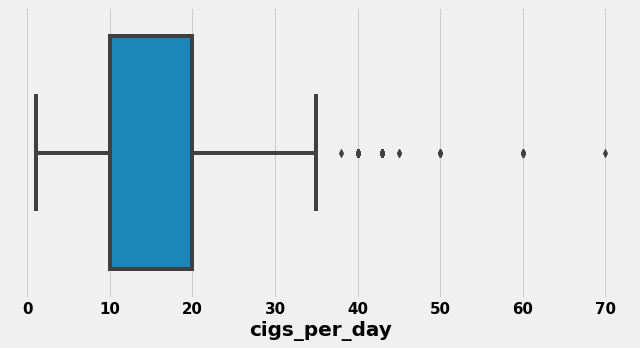

In [237]:
# box plot for the number of cigarettes per day for smokers (excluding non-smokers)
plt.figure(figsize=(10,5))
sns.boxplot(df3[df3['is_smoking']=='Yes']['cigs_per_day']);

In [238]:
# Finding median of X_train data in cigs_per_day
median_cigs = X_train[X_train['is_smoking']=='Yes']['cigs_per_day'].median()

# Filling missing values in X_train
X_train['cigs_per_day'] = X_train['cigs_per_day'].fillna(median_cigs)

# Filling missing values in X_test
X_test['cigs_per_day'] = X_test['cigs_per_day'].fillna(median_cigs)

#### **Imputation in 'total_cholesterol' , 'bmi' , 'heart_rate'** : Since all these columns have outliers we are imputing it with median

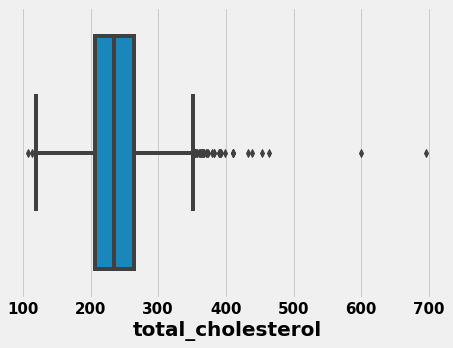

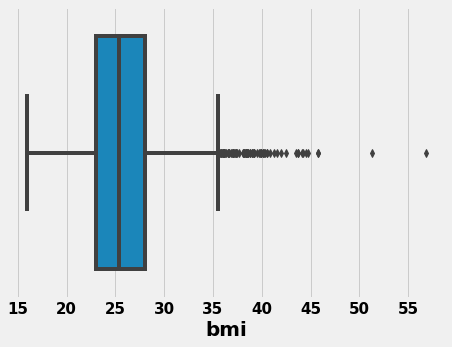

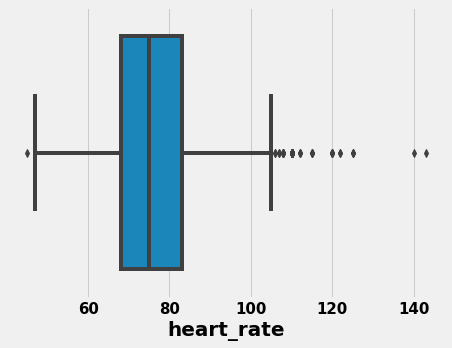

In [239]:
for col in ['total_cholesterol', 'bmi', 'heart_rate']:
 plt.figure(figsize=(7,5))
 sns.boxplot(df3[col]);

In [240]:
def filling_missing_values(dataset1,dataset2,feature_list):
  '''This function fills missing values in 'total_cholesterol','bmi','heart_rate' with median'''
  
  for feature in feature_list:
    # Finding median of X_train data of provided feature
    median_value_of_feature = dataset1[feature].median()
  
    # Filling missing values in X_train 
    dataset1[feature] = dataset1[feature].fillna(median_value_of_feature)
  
    # Filling missing values in X_test
    dataset2[feature] = dataset2[feature].fillna(median_value_of_feature)

In [241]:
# Filling missing values in 'total_cholesterol','bmi','heart_rate'
filling_missing_values(X_train,X_test,['total_cholesterol','bmi','heart_rate'])

#### **Imputation in 'glucose'** : 'glucose' has 8% missing values.If we use median to impute there is a great chance of disturbing the distribution of 'glucose'.Also in EDA we saw that glucose is an important feature.Hence we are KNN imputer for more accurate results  

### 3. Categorical Encoding

In [242]:
def encoding(dataset):
  ''' This function binary encodes 'sex','is_smoking','bp_meds','prevalent_stroke','prevalent_hyp','diabetes' 
      columns in dataset '''
  
  # Encoding 'sex' feature
  dataset['sex'] = dataset['sex'].map({'Male':1,'Female':0})
  
  # Encoding required list of columns
  for col in ['is_smoking','bp_meds','prevalent_stroke','prevalent_hyp','diabetes']:
    dataset[col] = dataset[col].map({'Yes':1,'No':0})  

In [243]:
# Encoding X_train and X_test
for element in [X_train,X_test]:
 encoding(element)

#### What all categorical encoding techniques have you used & why did you use those techniques?

We have used binary label encoding as all the categorical features had only 2 values

#### **Imputation in 'glucose'** : 'glucose' has 8% missing values.If we use median to impute there is a great chance of disturbing the distribution of 'glucose'.Also in EDA we saw that glucose is an important feature.Hence we are KNN imputer for more accurate results  

#### KNNImputer 

In [244]:
from sklearn.impute import KNNImputer
# Creating an instance of KNNImputer class
knn_impute = KNNImputer(n_neighbors=10)

# Fit_transform X_train
X_train = pd.DataFrame(knn_impute.fit_transform(X_train),columns=X_train.columns)

# Transform X_test
X_test = pd.DataFrame(knn_impute.transform(X_test),columns=X_test.columns)

#### KNN Imputer changes the datatype of all the features to 'float64'.So changing data types to required data types

In [245]:
# Changing datatype of given columns in list from float to integer
for col in ['age','sex','is_smoking','cigs_per_day','bp_meds','prevalent_stroke','prevalent_hyp','diabetes']:
  X_train[col] = X_train[col].astype('int64')
  X_test[col] = X_test[col].astype('int64')

In [246]:
# All missing values are imputed 
print(X_train.isnull().sum())
print(100*'-')
print(X_test.isnull().sum())

age                  0
sex                  0
is_smoking           0
cigs_per_day         0
bp_meds              0
prevalent_stroke     0
prevalent_hyp        0
diabetes             0
total_cholesterol    0
bmi                  0
heart_rate           0
glucose              0
pulse_pressure       0
dtype: int64
----------------------------------------------------------------------------------------------------
age                  0
sex                  0
is_smoking           0
cigs_per_day         0
bp_meds              0
prevalent_stroke     0
prevalent_hyp        0
diabetes             0
total_cholesterol    0
bmi                  0
heart_rate           0
glucose              0
pulse_pressure       0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

We have used 'Median Imputation' and 'KNN Imputer' for accurate imputation of missing values. We have made sure that while imputing, the distribution of columns being imputed does not change 


##### What data splitting ratio have you used and why? 

Answer Here.

### 4. Handling outliers 

In [247]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [248]:
dependent_var = ['ten_year_chd']
continuous_var = ['age','cigs_per_day','total_cholesterol','pulse_pressure', 'bmi', 'heart_rate', 'glucose']
categorical_var = ['sex', 'is_smoking','bp_meds','prevalent_stroke', 'prevalent_hyp', 'diabetes']

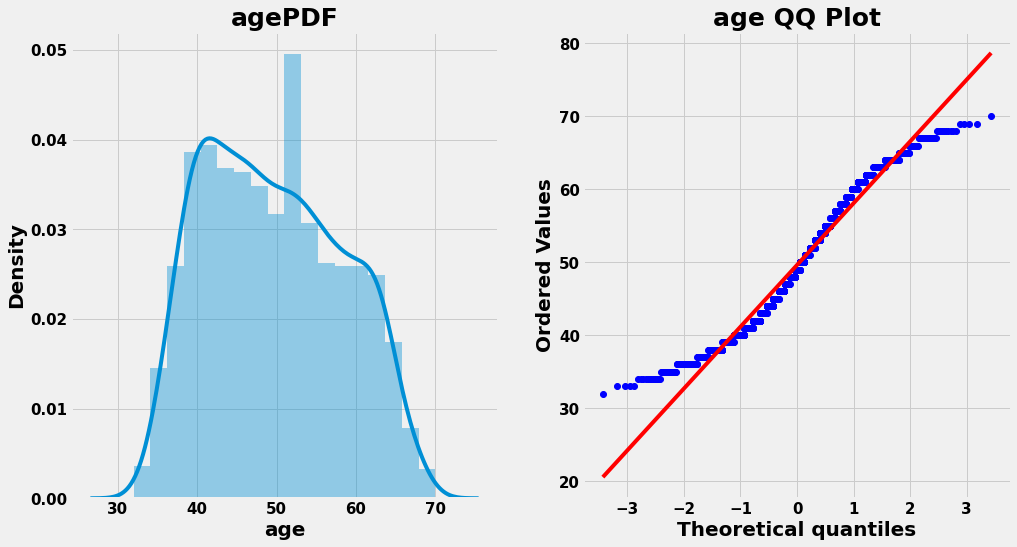

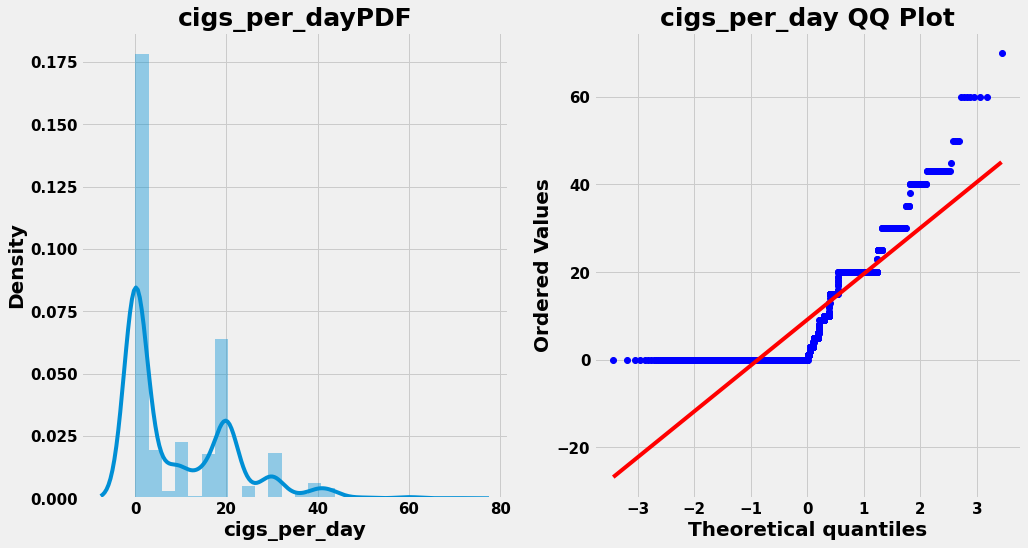

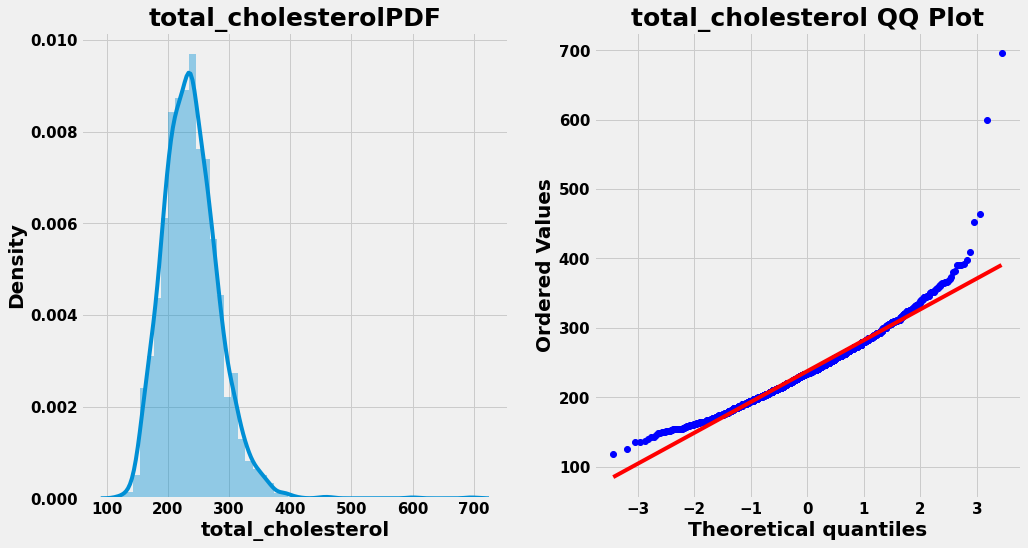

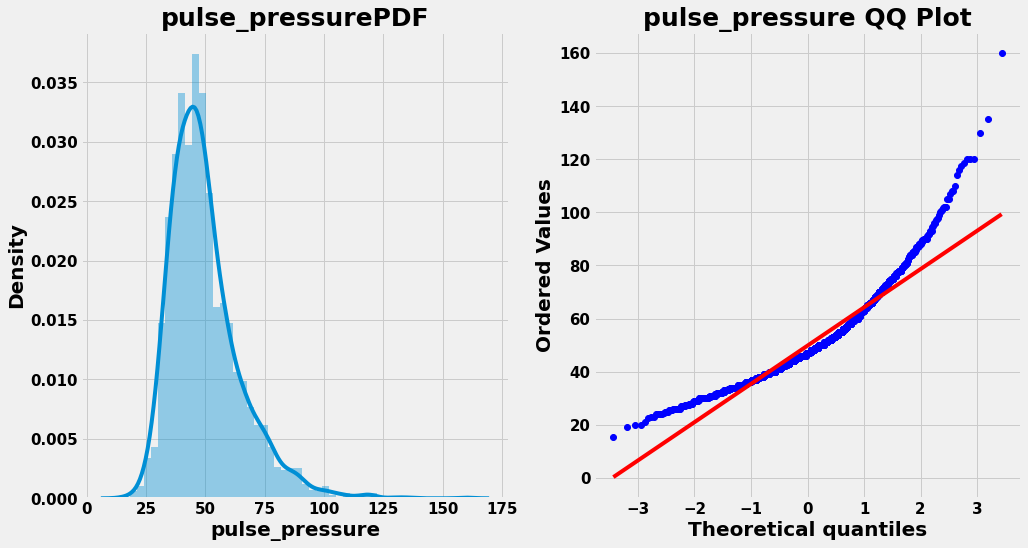

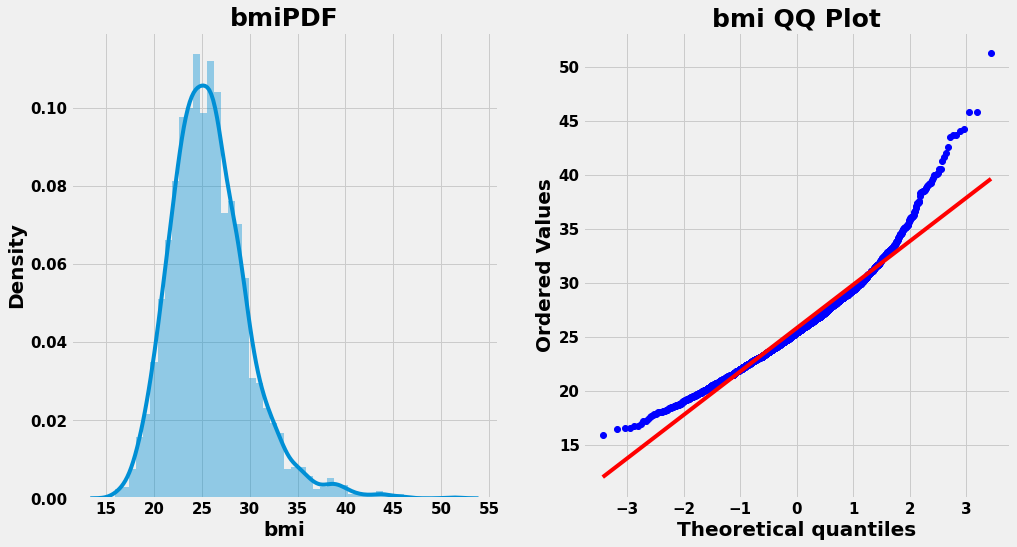

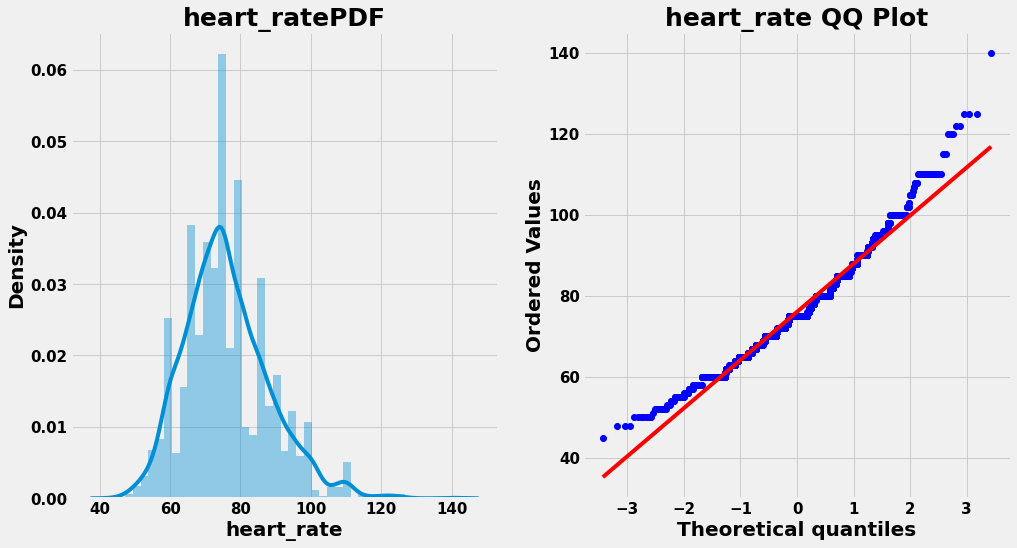

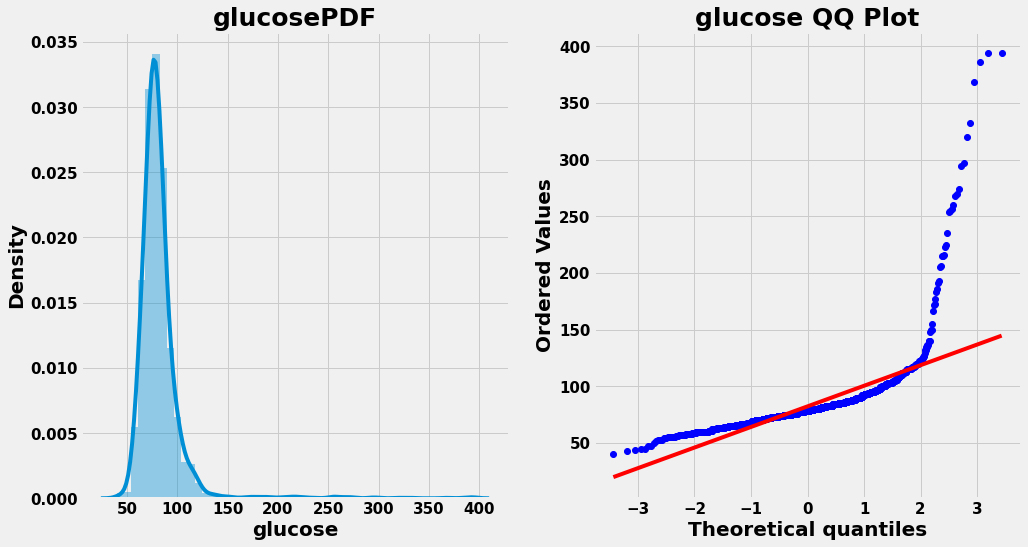

In [249]:
# checking for distribution in continuous features
for col in continuous_var:
  plt.figure(figsize=(15,8))
  plt.subplot(121)
  sns.distplot(X_train[col])
  plt.title(col+'PDF')

  plt.subplot(122)
  stats.probplot(X_train[col],dist='norm',plot=plt)
  plt.title(col+' QQ Plot')
  plt.show()

#### Transforming continuous variable to reduce skew

In [250]:
# skewness along the index axis
(X_train[continuous_var]).skew(axis = 0)

age                  0.208197
cigs_per_day         1.230909
total_cholesterol    1.122804
pulse_pressure       1.407770
bmi                  0.982133
heart_rate           0.675533
glucose              6.433606
dtype: float64

**Many continuous variables are skewed. By log transformation, we aim to reduce the magnitude of skew in these variables to a certain extent.**

In [251]:
# applying powertransformation on x_train and x_test
from sklearn.preprocessing import FunctionTransformer
trf = FunctionTransformer(func=np.log1p)
for i in ['total_cholesterol', 'bmi', 'heart_rate', 'glucose','pulse_pressure']:
  X_train_transformed = trf.fit_transform(X_train+0.000001)
  X_test_transformed = trf.transform(X_test+0.000001)


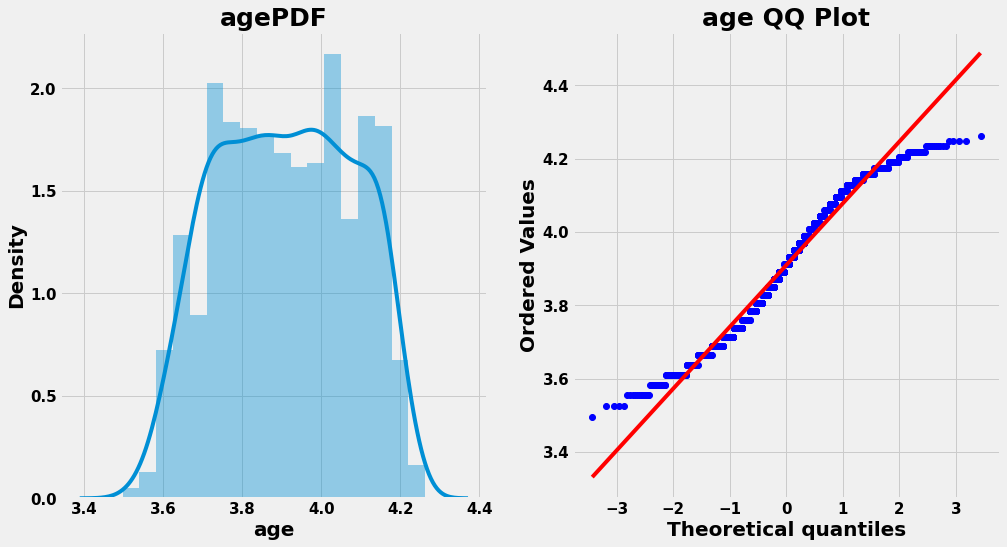

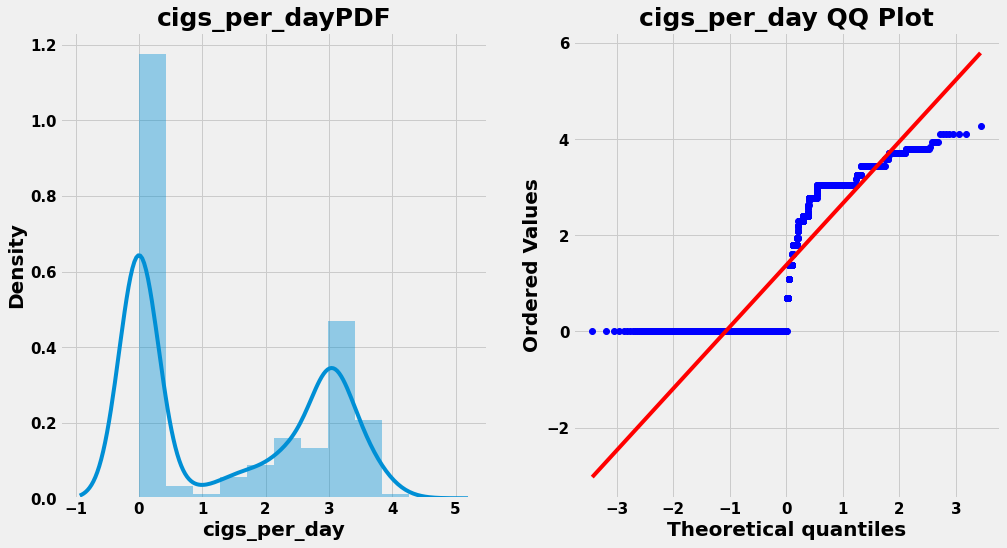

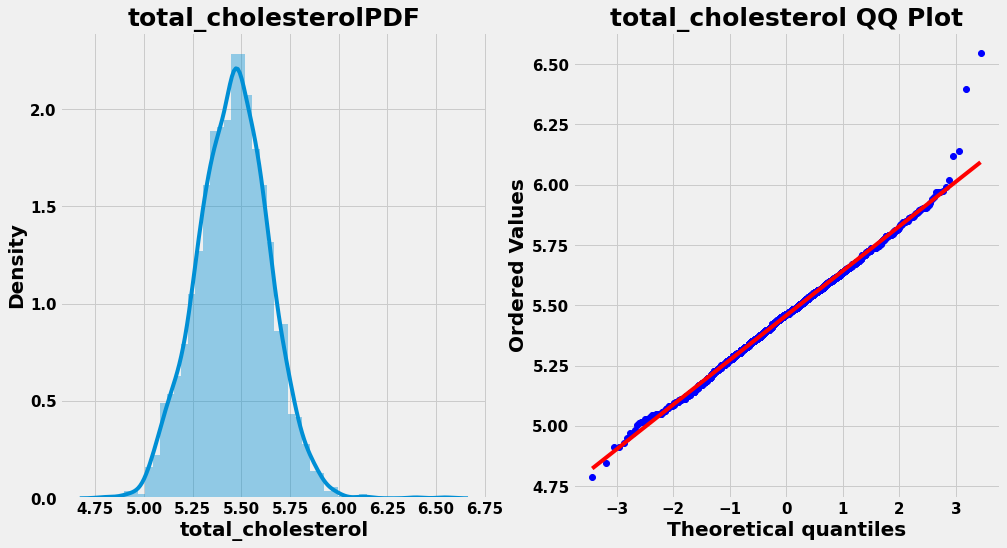

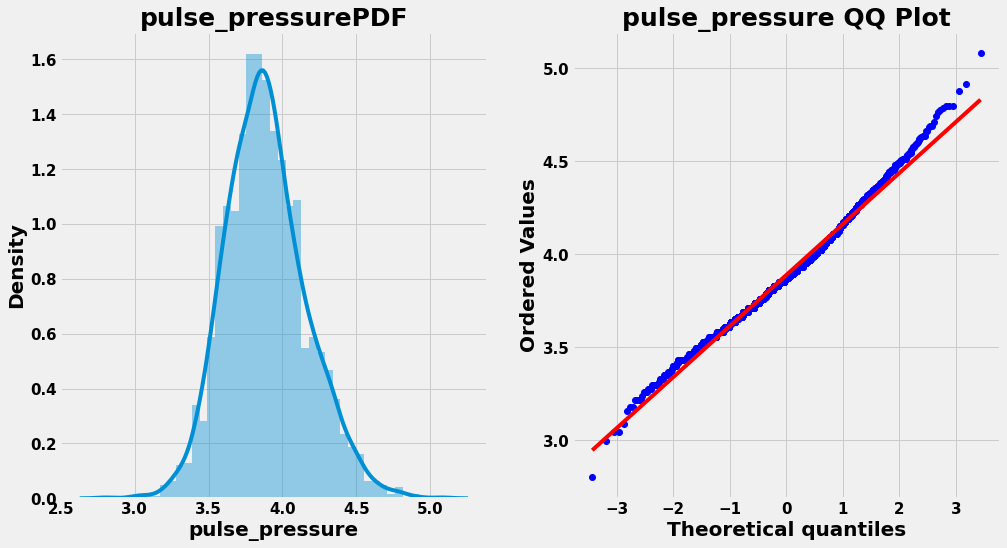

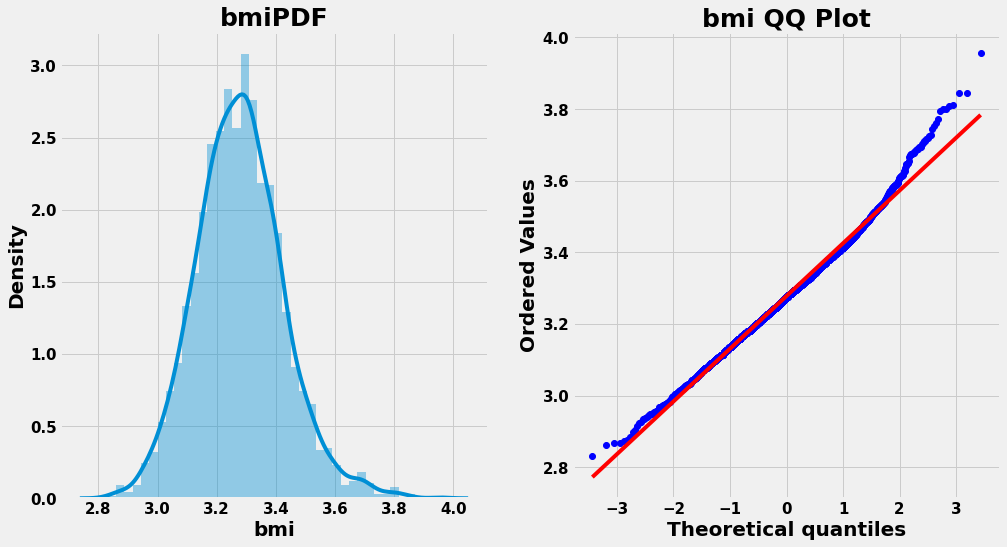

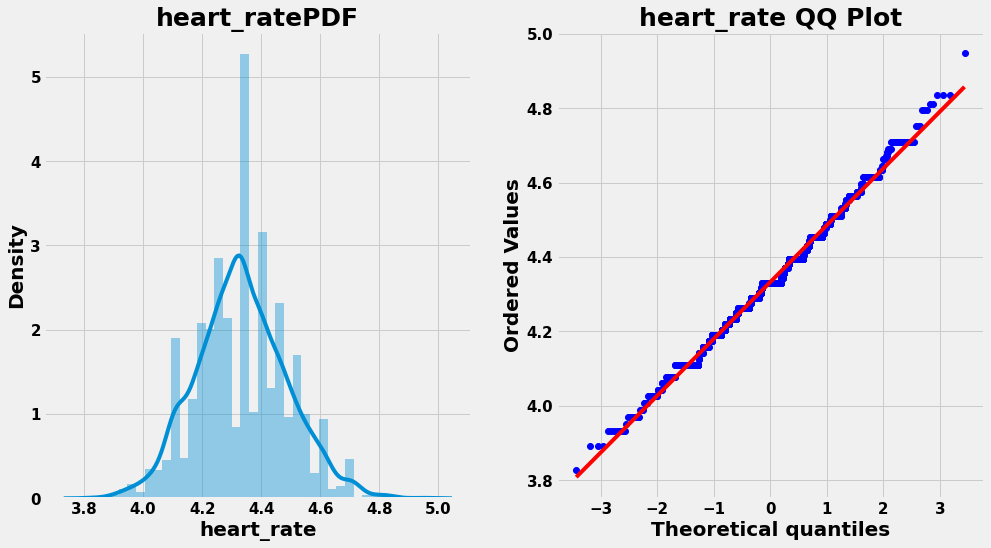

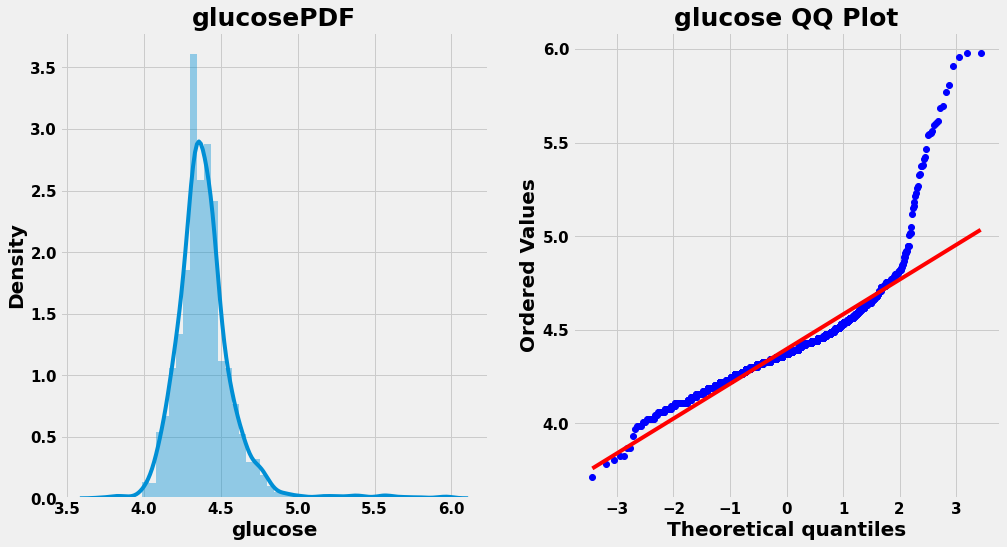

In [252]:
# checking for distribution in continuous features in train data
for col in continuous_var:
  plt.figure(figsize=(15,8))
  plt.subplot(121)
  sns.distplot(X_train_transformed[col])
  plt.title(col+'PDF')

  plt.subplot(122)
  stats.probplot(X_train_transformed[col],dist='norm',plot=plt)
  plt.title(col+' QQ Plot')
  plt.show()

**Except cigs_per_day, we have successfully able to reduce the skewness in the continuous variables. Now these distributions are closer to symmetric distribution.**

#### checking for outliers in transformed features:

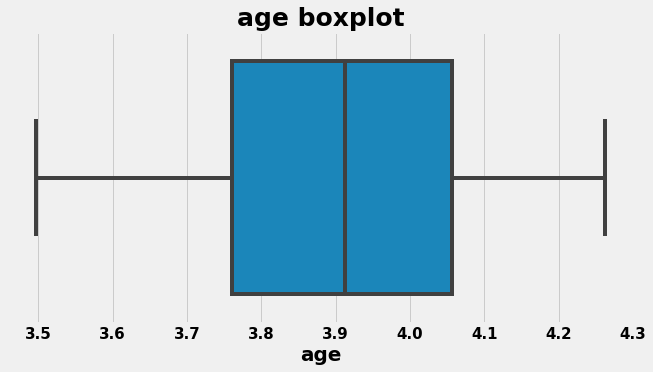

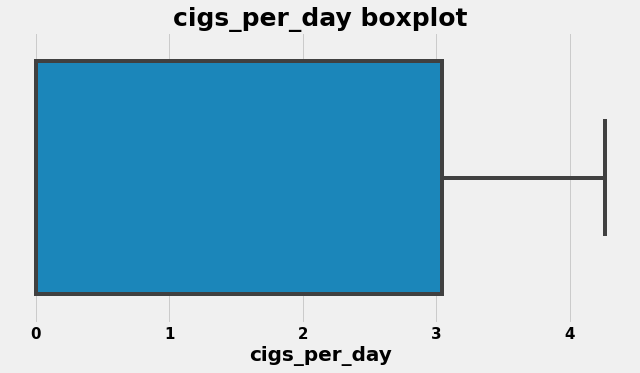

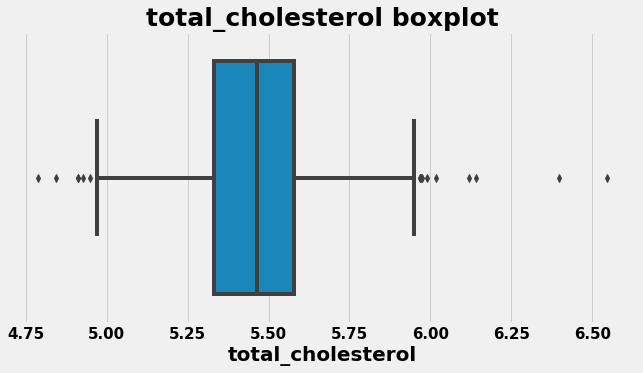

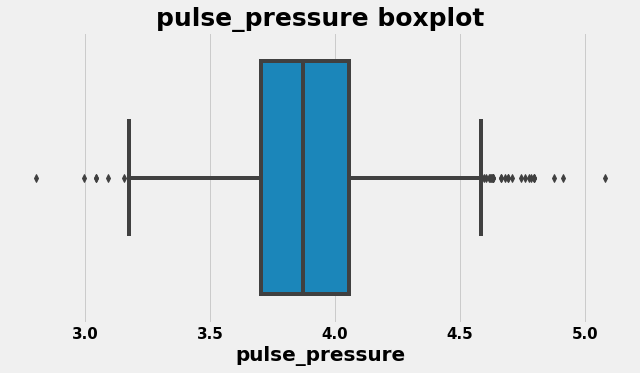

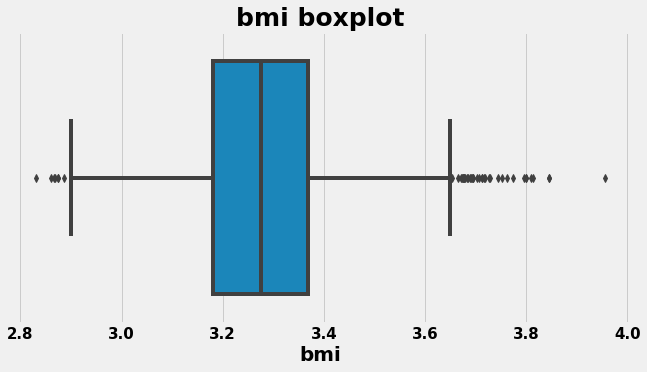

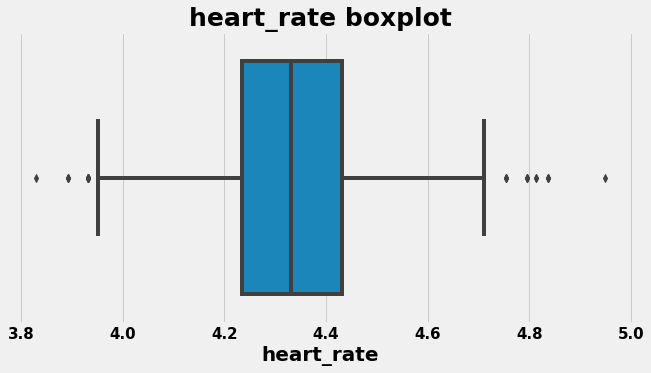

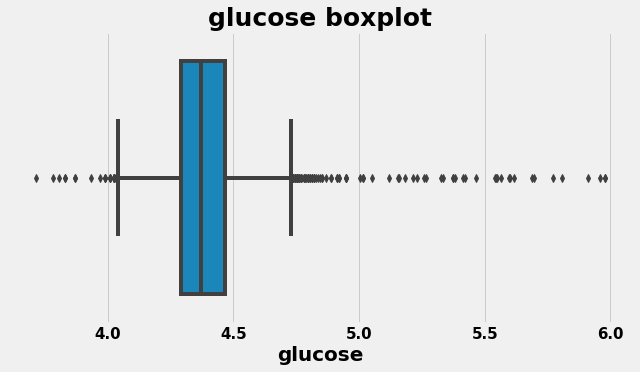

In [253]:
# checking for outliers in log transformed features
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.boxplot(X_train_transformed[col])
  plt.title(col+' boxplot')
  plt.show()



*   Except for age and cigs_per_day columns,rest of the continuous features contain outliers even after log transformation. 
*   To hadle this ,we can impute the outliers which are beyond 3 standard deviations from the mean with its median value on the train data.



In [254]:
# imputing the outliers beyond 3 standard deviations from the mean with its median value
for i in ['total_cholesterol', 'bmi', 'heart_rate', 'glucose','pulse_pressure']:
  upper_lim = X_train_transformed[i].mean() + 3 * X_train_transformed[i].std()
  lower_lim = X_train_transformed[i].mean() - 3 * X_train_transformed[i].std()
  X_train_transformed.loc[(X_train_transformed[i] > upper_lim),i] = X_train_transformed[i].median()
  X_train_transformed.loc[(X_train_transformed[i] < lower_lim),i] = X_train_transformed[i].median()

In [255]:
X_train_transformed[continuous_var].skew(axis = 0)

age                 -0.036952
cigs_per_day         0.269243
total_cholesterol   -0.041904
pulse_pressure       0.295810
bmi                  0.178421
heart_rate           0.086530
glucose              0.406752
dtype: float64

**we handle outliers in the train data ,and therby reducing skew.**

### 5. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [256]:

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

#### 2. Feature Selection

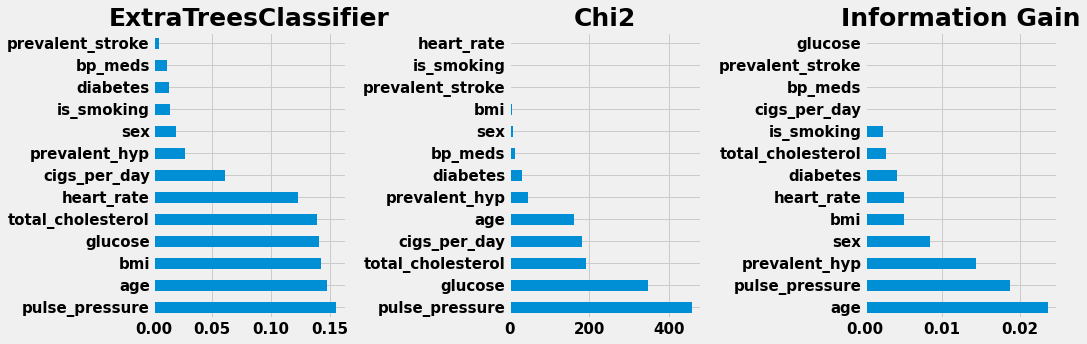

In [257]:
# Select your features wisely to avoid overfitting
extra_trees_model = ExtraTreesClassifier()
extra_trees_model.fit(X_train,y_train)
extra_trees_feature_rank = pd.Series(extra_trees_model.feature_importances_,index=X_train.columns)

select_k_best_model = SelectKBest(score_func=chi2,k='all')
select_k_best_model.fit(X_train,y_train)
chi2_feature_rank = pd.Series(select_k_best_model.scores_,index=X_train.columns)

mutual_info_feature_rank = pd.Series(mutual_info_classif(X_train,y_train),index=X_train.columns)


fig,axs = plt.subplots(1,3,figsize=(15,5))
extra_trees_feature_rank.sort_values(ascending=False).plot(kind='barh', title='ExtraTreesClassifier', ax=axs[0])
chi2_feature_rank.sort_values(ascending=False).plot(kind='barh', title='Chi2', ax=axs[1])
mutual_info_feature_rank.sort_values(ascending=False).plot(kind='barh', title='Information Gain', ax=axs[2])
plt.tight_layout()

In [258]:
# dropping is_smoking features from train ,test data
X_train_transformed.drop('is_smoking',axis = 1)
X_test_transformed.drop('is_smoking',axis = 1)


,age,sex,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,pulse_pressure
0,3.688879,9.999995e-07,1.386295e+00,9.999995e-07,9.999995e-07,9.999995e-07,9.999995e-07,5.231109,3.091497,4.394449,4.454347,3.637586
1,3.912023,9.999995e-07,9.999995e-07,9.999995e-07,9.999995e-07,9.999995e-07,9.999995e-07,5.673323,3.237109,4.394449,4.317488,3.839452
2,4.043051,6.931477e-01,9.999995e-07,9.999995e-07,9.999995e-07,9.999995e-07,9.999995e-07,5.497168,3.356200,4.394449,4.499810,3.998201
3,4.007333,9.999995e-07,9.999995e-07,9.999995e-07,9.999995e-07,9.999995e-07,9.999995e-07,5.488938,3.354804,4.369448,4.317488,3.401197
4,3.891820,6.931477e-01,9.999995e-07,9.999995e-07,9.999995e-07,9.999995e-07,9.999995e-07,5.513429,3.140698,4.369448,4.430817,3.970292
...,...,...,...,...,...,...,...,...,...,...,...,...
999,4.060443,6.931477e-01,3.044522e+00,9.999995e-07,9.999995e-07,9.999995e-07,9.999995e-07,5.583496,3.373484,4.304065,4.615121,3.784190
1000,4.158883,6.931477e-01,1.945910e+00,9.999995e-07,9.999995e-07,6.931477e-01,9.999995e-07,5.549076,3.396185,4.394449,4.442651,4.127134
1001,4.025352,6.931477e-01,3.044522e+00,9.999995e-07,9.999995e-07,6.931477e-01,9.999995e-07,5.641907,3.224460,4.330733,4.204693,4.060443
1002,4.174387,6.931477e-01,9.999995e-07,9.999995e-07,9.999995e-07,9.999995e-07,9.999995e-07,5.429346,3.190065,4.262680,4.406719,3.737670


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 6. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [259]:
# Transform Your data

### 7. Data Scaling

In [260]:
# importing library
from sklearn.preprocessing import StandardScaler
# Scaling data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_transformed)
X_test_scaled = scaler.transform(X_test_transformed)

# Converting array to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

##### Which method have you used to scale you data and why?

### 8. Handling Imbalanced Dataset

* Since we are dealing with unbalanced data, ie, only ~15% of the patients were diagnosed with coronary heart disease, we oversample the train dataset using SMOTE (Synthetic Minority Oversampling Technique).
* This ensures that the model has trained equally on all kinds of results, and it is not biased to one particular result.

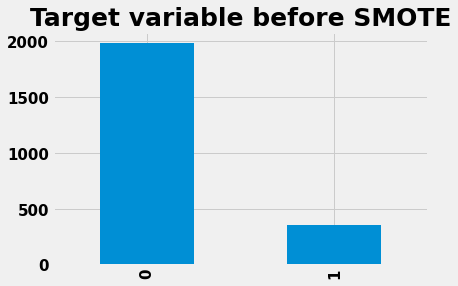

In [261]:
# visualize the target variable before SMOTE
y_train.value_counts().plot(kind='bar', title='Target variable before SMOTE')

In [262]:
# installing package
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [263]:
# Oversampling using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# fit predictor and target variable
X_scaled_smote, y_smote = smote.fit_resample(X_train_scaled, y_train)

print('Samples in the original dataset', len(y_train))
print('Samples in the resampled dataset', len(y_smote))

Samples in the original dataset 2342
Samples in the resampled dataset 3976


## ***7. ML Model Implementation***

### ML Model - 1

In [264]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [265]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [266]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [267]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [268]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [269]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [270]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [271]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [272]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [273]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***